<img src="figs/TheOhioStateUniversity-Scarlet-Horiz-RGBHEX.png" 
        alt="Picture" 
        width="200" 
        style="display: block; margin: 0 auto" />

---

# Predicting Chaos: Machine Learning Classifications of Duffing Oscillator Behaviors

**Author:** Ryan Hardig  
**Project Category:** Chaos Theory  
**Course:** Physics 5680, Autumn 2025  
**Date:** October 2025

---

## Abstract

Chaos in nonlinear dynamical systems arises from deterministic equations that exhibit unpredictable behavior based on small changes in initial conditions. This project explores whether a machine learning model can learn to recognize and predict chaotic regimes in the forced Duffing oscillator based on its parameters. Here, we will create an aritifical datatset, solving the Duffing Equation numerically across a wide range of parameters $(\alpha, \beta, \delta, \gamma, \omega)$. We will label each set of parameters as chaotic or periodic according to its **Largest Lyapunov Exponent (LLE)**, a common classifier of chaos.  

The resulting dataset is used to train supervised ML models for two tasks:  
1. **Binary classification** of chaos versus non-chaos, and  
2. **Regression-based prediction** of the LLE value (stretch goal).  


---

## 1. Introduction

### Problem Description  
Chaotic systems exhibit deterministic equations that lead to unpredictable and highly sensitive behavior. In this project, we aim to train a machine learning model to predict whether a **Duffing oscillator** will behave chaotically, given a set of parameters. We choose the Duffing oscillator due to its extensive use in studying chaotic behaviors. To correctly identify chaotic behavior, we will use  **Largest Lyapunov Exponent (LLE)**. We will test the accuracy and precision of the model by comparing its predictions with the LLE. 

### Motivation  
While chaos is well understood mathematically, it remains computationally expensive to map chaotic regions given a range of parameters. If a trained ML model can accurately identify chaos from system parameters alone, it could provide a fast tool for studying nonlinear systems without repeatedly solving differential equations. Beyond this specific example, the approach demonstrates how ML can assist in physics research, learning relationships that are analytically expensive. 

### Background  
The forced and damped Duffing oscillator is described by:  

$\ddot{x} + \delta \dot{x} + \alpha x + \beta x^3 = \gamma \cos(\omega t),$

where $\alpha$ and $\beta$ describe the "stiffness" of the potential, $\delta$ is the damping coefficient, and $ \gamma $ and $ \omega $ respectively are the amplitude and frequency of an external driving force. Depending on these parameters, the system transitions between ranges of stable, periodic oscillations and chaos. A positive LLE indicates chaos, while negative values correspond to periodic or quasi-periodic behavior.  

To generate data, we solve the Duffing equation numerically solved for a wide range of parameter combinations, and each case is labeled according to its LLE. This dataset forms the foundation for training and evaluating ML models.

### Inputs and Outputs  
- **Input:** System parameters $(\alpha, \beta, \delta, \gamma, \omega).$  
- **Output:**  
  1. A **binary classification** indicating whether the system is chaotic or non-chaotic.  
  2. (Stretch goal) A **regression output** estimating the numerical value of the largest Lyapunov exponent (LLE).  

The model will be implemented in Python, using standard machine learning libraries like TensorFlow. Below shown is an example of two plotted duffing equations. The graphs on the left are periodic (top) and chaotic (bottom) time graphs. To the right are their respective perturbation graphs where the slope corresponds to the LLE. 

In [1]:
# import matplotlib.pyplot as plt
# img = plt.imread('plots/Periodic_vs_chaotic_graphs.png')
# plt.imshow(img)

---

## 2. Related Work


### Classical Chaos Detection

The foundational tools for identifying chaos come from nonlinear dynamics and numerical analysis. Early work by Benettin et al. (1980) and later Wolf et al. (1985) established standard algorithms for computing the largest Lyapunov exponent (LLE) from numerical trajectories. These techniques quantify the exponential divergence of nearby solutions and can distinguish periodic and chaotic motion in systems like the Duffing oscillator. Additional tools such as Poincaré sections and bifurcation diagrams are essential visual aids in chaos theory.
However, their tradeoff is computational cost. These tools map full parameter spaces of a chaotic system and require hundreds and thousands of long integrations, becoming costly for a large set of paramters.

### Time-Series–Based Machine Learning for Chaos

More recently, machine learning has been applied directly to observed trajectories in order to detect or model chaotic behavior. Work by Pathak et al. (2017, 2018) demonstrated that recurrent neural networks and reservoir computing architectures can learn chaotic attractors, forecast short-term dynamics, and even estimate Lyapunov exponents directly from data. These models do not require knowledge of the governing equations and so are very effective in experimental settings where only time-series measurements are available. Relying only on time-series events demands careful data cleaning and an immense amount of data to produce an effective model. To avoid cleaning chaotic experimental data, we will use artificial data, categorized by the LLE. 

### Machine Learning Surrogates for Parameter-Space Chaos Classification

A separate line of recent work uses machine learning to classify chaos across parameter space, particularly in discrete dynamical maps such as the logistic and standard maps. Studies such as Lee et al. (2020) and Hassona et al. (2021) trained neural networks to distinguish chaotic vs. regular regions using precomputed Lyapunov exponents as labels. These models act as surrogates, replacing large numerical sweeps with instant predictions. These studies are most closely related to my project and differ from mine in the chaotic equation chosen. 

### Methods Adopted in This Work

This project incorporates several techniques from previous research. For labeling, we adopt the LLE estimation method of Wolf et al. (1985). From the machine-learning literature, we draw on the idea of training a parameter-to-chaos classifier, similar to recent Lee et al. (2020) and Hassona et al. (2021).

Our models learn the mapping


(α,β,δ,γ,ω)⟶{chaotic, non-chaotic},

allowing for the prediction of chaotic behavior without directly solving the differential equation. This makes it possible to explore high-dimensional parameter spaces efficiently and identify chaotic or periodic regions much more quickly than traditional numerical methods.

### References

Benettin, G., Galgani, L., Giorgilli, A., & Strelcyn, J.-M. (1980).
Lyapunov characteristic exponents for smooth dynamical systems and for Hamiltonian systems; A method for computing all of them. Part 1: Theory.
Meccanica, 15, 9–20.

Wolf, A., Swift, J. B., Swinney, H. L., & Vastano, J. A. (1985).
Determining Lyapunov exponents from a time series.
Physica D: Nonlinear Phenomena, 16(3), 285–317.

Pathak, J., Hunt, B. R., Girvan, M., Lu, Z., & Ott, E. (2017).
Using machine learning to replicate chaotic attractors and calculate Lyapunov exponents from data.
Chaos: An Interdisciplinary Journal of Nonlinear Science, 27(12), 121102.

Pathak, J., Lu, Z., Hunt, B. R., Girvan, M., & Ott, E. (2018).
Model-Free Prediction of Large Spatiotemporally Chaotic Systems from Data.
Physical Review Letters, 120(2), 024102.

Lee, G., Nelson, R., Hassona, S., et al. (2020).
Deep learning classification of chaos in the standard map.
(Preprint on arXiv; commonly cited in chaos+ML literature.)

Hassona, S., Yao, Y., & Qureshi, M. A. (2021).
Time series classification and creation of 2D bifurcation diagrams using machine learning.
Applied Soft Computing, 108, 107448.



---

## 3. Ethical Considerations

This project utilizes my own synthetically generated data from numerical simulations of the Duffing oscillator, meaning it does not use any personal or sensitive information. So issues relating to data will now apply. However, this project highlights a larger concern in machine-learning. That is, the models inherit biases and contain limitations from their training data. So these models can make incorrect predictions outside of its trained set.

Although predicting chaos in Duffing equation does not have a direct negative impact on the world, similar modeling techniques could be used in settings such as financial forecasting where "predicting chaos" could lead to catastrophic financial events. But if used ethically, this project demonstrates how machine learning can affect scientific research by reducing computational cost and broadening the exploration of chaotic systems. Therefore, our ethical obligation is to be clear about what the model can and cannot predict, and to treat ML-based tools as supplements and not replacements to classic numerical analysis.


-----

## 4. Project Setup and Imports

*(This initial section is for setting up your project's environment. It includes importing the necessary Python libraries and documenting their versions to ensure your work is reproducible.)*

### 1.1. Key Libraries

Below is a brief description of the primary Python packages that will be used in this project.

  * **pandas:** Used for data manipulation and analysis. It provides powerful data structures, like the DataFrame, for handling and exploring structured data.
  * **numpy:** The fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
  * **matplotlib & seaborn:** These are libraries for data visualization. Matplotlib is a comprehensive library for creating static visualizations, while Seaborn provides a high-level interface for drawing attractive and informative statistical graphics.
  * **Plotly:** A graphing library used to create interactive, publication-quality visualizations.  This is especially useful for creating dynamic plots that allow for zooming, panning, and hovering to inspect data points.
  * **scikit-learn:** A primary machine learning library that provides simple and efficient tools for data mining and data analysis, including a wide range of classification, regression, and clustering algorithms.
  * **TensorFlow:** An end-to-end open-source platform for machine learning, specializing in deep learning. It is used for building and training neural networks for tasks like image classification, natural language processing, and more.



In [2]:
# Core data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter utilities
from IPython.display import Image, display

# Scikit-learn - Model Selection and Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, cross_validate
from sklearn.preprocessing import StandardScaler

# Scikit-learn - Neural Networks
from sklearn.neural_network import MLPClassifier, MLPRegressor

# Scikit-learn - Metrics
from sklearn.metrics import (
    # Classification metrics
    roc_auc_score, precision_score, confusion_matrix,
    classification_report, roc_curve, auc,
    precision_recall_curve, f1_score, recall_score,
    # Regression metrics
    mean_squared_error, mean_absolute_error, r2_score
)

# Scikit-learn - Feature Importance
from sklearn.inspection import permutation_importance

# Scikit-learn - Baseline Models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# System libraries
import sys
import os

# Custom module
from duffing.model import train_mlp_model, load_dataset

# Configure matplotlib for better-looking plots
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10, 6)


### 4.2. Version Information

*(To ensure that the results in this notebook can be reproduced, it is important to record the versions of the key libraries used. The code below will print the versions of Python and the packages listed above.)*



In [3]:
# Display Python and library versions for reproducibility
import sklearn
import IPython

print("=" * 60)
print("ENVIRONMENT CONFIGURATION")
print("=" * 60)
print(f"Python: {sys.version.split()[0]}")
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")
print(f"IPython: {IPython.__version__}")
print("=" * 60)

ENVIRONMENT CONFIGURATION
Python: 3.11.9
Pandas: 2.3.3
NumPy: 2.3.3
Matplotlib: 3.10.6
Seaborn: 0.13.2
Scikit-learn: 1.7.2
IPython: 9.6.0


---

## 5. The Dataset

### Overview

This project utilizes a **custom-generated dataset** of Duffing oscillator simulations, specifically designed to study chaos prediction using machine learning. Each row in the dataset represents a unique set of physical parameters for the forced, damped Duffing oscillator, along with computed labels indicating whether the system exhibits chaotic or periodic behavior.

The dataset was generated using GPU-accelerated numerical integration on Ohio Supercomputer Center (OSC) resources, enabling efficient exploration of a large parameter space that would be computationally prohibitive on standard hardware.

### 5.1 Dataset Description

#### Source and Generation Method

The dataset was **self-generated** for this project using custom Python code that solves the Duffing equation:

$$\ddot{x} + \delta \dot{x} + \alpha x + \beta x^3 = \gamma \cos(\omega t)$$

**Generation Process:**
1. Parameter ranges were sampled uniformly from physically meaningful intervals
2. For each parameter set, the Duffing equation was integrated using `torchdiffeq` (PyTorch-based ODE solver)
3. The Largest Lyapunov Exponent (LLE) was computed using the Benettin algorithm
4. Binary labels were assigned: `periodic=True` if LLE < 0, `periodic=False` if LLE ≥ 0

**Computational Resources:**
- Generated on OSC (Ohio Supercomputer Center) using 2× Tesla V100 GPUs
- Generation time: ~90 minutes for full dataset
- Processing rate: ~11-12 samples/second with Lyapunov computation

#### Dataset Statistics

**File:** `data/12162025_191754_combined.csv`

The dataset consists of the following features and target variables:

In [4]:
# Load dataset
df_gpu = pd.read_csv('data/12162025_191754_combined.csv')

print("Dataset Overview:")
print(f"Shape: {df_gpu.shape[0]:,} rows × {df_gpu.shape[1]} columns")
print(f"File size: ~{df_gpu.memory_usage(deep=True).sum() / 1024**2:.2f} MB in memory")
print("\nColumns:", df_gpu.columns.tolist())

# Display first few rows
display(df_gpu.head(10))

# Basic statistics
print("\n" + "="*60)
print("Summary Statistics:")
print("="*60)
display(df_gpu.describe())

# Check data types and missing values
print("\n" + "="*60)
print("Data Quality Check:")
print("="*60)
print("\nData types:")
print(df_gpu.dtypes)
print("\nMissing values:")
missing = df_gpu.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values detected ✓")

# Target variable distribution
print("\n" + "="*60)
print("Target Variable Distribution:")
print("="*60)
print(f"\nPeriodic (True):  {(df_gpu['periodic'] == True).sum():,} samples ({100 * (df_gpu['periodic'] == True).mean():.2f}%)")
print(f"Chaotic (False):  {(df_gpu['periodic'] == False).sum():,} samples ({100 * (df_gpu['periodic'] == False).mean():.2f}%)")

print(f"\nLyapunov Exponent Range: [{df_gpu['lyapunov'].min():.4f}, {df_gpu['lyapunov'].max():.4f}]")
print(f"Mean Lyapunov: {df_gpu['lyapunov'].mean():.4f}")
print(f"Median Lyapunov: {df_gpu['lyapunov'].median():.4f}")

Dataset Overview:
Shape: 129,536 rows × 9 columns
File size: ~8.03 MB in memory

Columns: ['delta', 'alpha', 'beta', 'omega', 'gamma', 'base_id', 'label_gamma', 'lyapunov', 'periodic']


,delta,alpha,beta,omega,gamma,base_id,label_gamma,lyapunov,periodic
0,0.065134,-1.937198,0.700303,1.772624,0.473373,0,0.473373,0.112113,False
1,0.028098,0.520404,0.557699,0.643527,0.983201,1,0.983201,-0.006095,True
2,0.021874,1.936468,1.624245,0.805549,2.504043,2,2.504043,-0.013060,True
3,0.028997,-0.558058,1.861000,0.500427,1.085811,3,1.085811,-0.011756,True
4,0.033945,1.825325,1.654252,0.573639,4.457276,4,4.457276,-0.015844,True
5,0.044203,-0.683835,0.513522,0.993040,4.891156,5,4.891156,-0.002658,True
6,0.045060,-0.489561,1.022192,0.472541,1.855154,6,1.855154,0.078319,False
7,0.021190,-1.652171,0.833716,1.040169,3.618526,7,3.618526,-0.005016,True
8,0.028398,1.307215,0.768708,1.096838,2.605878,8,2.605878,-0.013649,True
9,0.082295,-0.425662,1.657225,1.506779,2.081453,9,2.081453,-0.023197,True



Summary Statistics:


,delta,alpha,beta,omega,gamma,base_id,label_gamma,lyapunov
count,129536.000000,129536.000000,129536.000000,129536.000000,129536.000000,129536.000000,129536.000000,129536.000000
mean,0.054933,-0.003939,1.200059,1.199665,2.550225,32384.005929,2.550225,0.014212
std,0.025925,1.153843,0.462210,0.461899,1.414510,18697.859555,1.414510,0.059680
min,0.010000,-1.999927,0.400000,0.400018,0.100017,0.000000,0.100017,-0.061249
25%,0.032492,-0.999538,0.800164,0.799195,1.327184,16191.750000,1.327184,-0.025757
50%,0.054947,-0.008197,1.200348,1.201015,2.544075,32383.500000,2.544075,-0.007753
75%,0.077422,0.994932,1.600514,1.598988,3.778873,48575.250000,3.778873,0.035924
max,0.100000,1.999982,1.999999,1.999994,4.999923,65023.000000,4.999923,0.396214



Data Quality Check:

Data types:
delta          float64
alpha          float64
beta           float64
omega          float64
gamma          float64
base_id          int64
label_gamma    float64
lyapunov       float64
periodic          bool
dtype: object

Missing values:
No missing values detected ✓

Target Variable Distribution:

Periodic (True):  76,222 samples (58.84%)
Chaotic (False):  53,314 samples (41.16%)

Lyapunov Exponent Range: [-0.0612, 0.3962]
Mean Lyapunov: 0.0142
Median Lyapunov: -0.0078


### 5.2 Feature and Target Descriptions

#### Input Features (System Parameters)

The dataset contains **5 physical parameters** that define the Duffing oscillator dynamics:

| Parameter | Symbol | Physical Meaning | Typical Range |
|-----------|--------|------------------|---------------|
| `delta` | $\delta$ | Damping coefficient | [0.1, 0.5] |
| `alpha` | $\alpha$ | Linear stiffness coefficient | [-1.5, 1.5] |
| `beta` | $\beta$ | Nonlinear (cubic) stiffness | [0.5, 1.5] |
| `omega` | $\omega$ | Driving frequency (rad/s) | [0.5, 1.5] |
| `gamma` | $\gamma$ | Driving force amplitude | [0.1, 0.5] |

These parameters determine whether the system evolves to periodic oscillations or chaotic motion.

#### Target Variables

**Binary Classification Target:**
- **`periodic`** (boolean): 
  - `True` = Periodic/regular behavior (LLE < 0)
  - `False` = Chaotic behavior (LLE ≥ 0)

**Regression Target:**
- **`lyapunov`** (float): The Largest Lyapunov Exponent
  - Negative values → exponential convergence (periodic)
  - Positive values → exponential divergence (chaos)
  - Magnitude indicates rate of divergence/convergence

#### Additional Columns

- **`base_id`**: Identifier linking to base parameter sets
- **`label_gamma`**: Specific gamma value label for bifurcation analysis

### 5.3 Data Preprocessing and Cleaning

In [5]:
# Start from the loaded dataset
initial_count = len(df_gpu)
df_clean = df_gpu.drop_duplicates().reset_index(drop=True)
duplicates_removed = initial_count - len(df_clean)

print(f"Duplicates removed: {duplicates_removed}")

# Remove any rows with infinite or NaN lyapunov values
df_clean = df_clean[np.isfinite(df_clean['lyapunov'])]

# Remove outliers in Lyapunov exponent (extremely large positive/negative values)
lyap_q01 = df_clean['lyapunov'].quantile(0.01)
lyap_q99 = df_clean['lyapunov'].quantile(0.99)
outliers = len(df_clean[(df_clean['lyapunov'] < lyap_q01) | (df_clean['lyapunov'] > lyap_q99)])
df_clean = df_clean[(df_clean['lyapunov'] >= lyap_q01) & (df_clean['lyapunov'] <= lyap_q99)]

print(f"Outliers removed (Lyapunov): {outliers}")
print(f"Final dataset size: {len(df_clean):,} samples")

# Verify class balance after cleaning
print("\n" + "="*70)
print("CLASS BALANCE AFTER CLEANING")
print("="*70)
periodic_clean = df_clean['periodic'].value_counts()
for label, count in periodic_clean.items():
    label_name = "Periodic" if label else "Chaotic"
    print(f"{label_name}: {count:,} ({count/len(df_clean)*100:.2f}%)")

# Define feature columns for modeling
feature_cols = ['delta', 'alpha', 'beta', 'omega', 'gamma']
print(f"\nFeature columns for ML: {feature_cols}")

Duplicates removed: 0
Outliers removed (Lyapunov): 2592
Final dataset size: 126,944 samples

CLASS BALANCE AFTER CLEANING
Periodic: 74,926 (59.02%)
Chaotic: 52,018 (40.98%)

Feature columns for ML: ['delta', 'alpha', 'beta', 'omega', 'gamma']


### 5.4 Train/Validation/Test Split

To ensure unbiased model evaluation, we split the dataset into three subsets:

- **Training Set (60%)**: Used to train model parameters
- **Validation Set (20%)**: Used for hyperparameter tuning and early stopping
- **Test Set (20%)**: Held out for final performance evaluation

We use **stratified splitting** for classification to preserve class balance across splits.

In [6]:
# First split: 80% train+val, 20% test
X = df_clean[feature_cols].values
y = df_clean['periodic'].values

X_trainval, X_test_split, y_trainval, y_test_split = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: 75% train, 25% val (of the 80%) = 60% train, 20% val of total
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval
)

print("="*70)
print("DATASET SPLITS")
print("="*70)
print(f"Training samples:   {len(X_train_split):>8,} ({len(X_train_split)/len(df_clean)*100:>5.1f}%)")
print(f"Validation samples: {len(X_val_split):>8,} ({len(X_val_split)/len(df_clean)*100:>5.1f}%)")
print(f"Test samples:       {len(X_test_split):>8,} ({len(X_test_split)/len(df_clean)*100:>5.1f}%)")
print(f"{'─'*70}")
print(f"Total:              {len(df_clean):>8,} (100.0%)")

# Verify class distribution in each split
print("\n" + "="*70)
print("CLASS DISTRIBUTION PER SPLIT")
print("="*70)
for name, y_split in [("Train", y_train_split), ("Val", y_val_split), ("Test", y_test_split)]:
    periodic_pct = np.mean(y_split) * 100
    chaotic_pct = 100 - periodic_pct
    print(f"{name:12s}: Periodic {periodic_pct:>5.2f}% | Chaotic {chaotic_pct:>5.2f}%")

DATASET SPLITS
Training samples:     76,166 ( 60.0%)
Validation samples:   25,389 ( 20.0%)
Test samples:         25,389 ( 20.0%)
──────────────────────────────────────────────────────────────────────
Total:               126,944 (100.0%)

CLASS DISTRIBUTION PER SPLIT
Train       : Periodic 59.02% | Chaotic 40.98%
Val         : Periodic 59.02% | Chaotic 40.98%
Test        : Periodic 59.02% | Chaotic 40.98%


### 5.5 Feature Normalization

Neural networks perform better when input features are standardized (zero mean, unit variance). We apply **StandardScaler** to all input features:

$$x_{\text{scaled}} = \frac{x - \mu}{\sigma}$$

**Important:** The scaler is fit **only on training data** to prevent data leakage. The same transformation is then applied to validation and test sets.

In [7]:
# Fit scaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)
X_test_scaled = scaler.transform(X_test_split)

print("="*70)
print("FEATURE NORMALIZATION VERIFICATION")
print("="*70)
print("\nTraining set statistics after scaling:")
print(f"  Mean (should be ~0): {X_train_scaled.mean(axis=0)}")
print(f"  Std  (should be ~1): {X_train_scaled.std(axis=0)}")

# Show original vs scaled ranges
print("\n" + "="*70)
print("FEATURE RANGES: ORIGINAL vs SCALED")
print("="*70)
for i, col in enumerate(feature_cols):
    orig_min, orig_max = X_train_split[:, i].min(), X_train_split[:, i].max()
    scaled_min, scaled_max = X_train_scaled[:, i].min(), X_train_scaled[:, i].max()
    print(f"{col:8s}: [{orig_min:>6.3f}, {orig_max:>6.3f}] → [{scaled_min:>6.3f}, {scaled_max:>6.3f}]")

FEATURE NORMALIZATION VERIFICATION

Training set statistics after scaling:
  Mean (should be ~0): [-9.26043138e-15  2.69006721e-18 -4.45960771e-14  7.73773615e-14
  8.25086104e-15]
  Std  (should be ~1): [1. 1. 1. 1. 1.]

FEATURE RANGES: ORIGINAL vs SCALED
delta   : [ 0.010,  0.100] → [-1.729,  1.770]
alpha   : [-2.000,  2.000] → [-1.737,  1.738]
beta    : [ 0.400,  2.000] → [-1.732,  1.727]
omega   : [ 0.400,  2.000] → [-1.725,  1.746]
gamma   : [ 0.100,  5.000] → [-1.747,  1.722]


### 5.6 Data Visualization

Visualizing the dataset helps understand the distribution of parameters, class balance, and relationships between features and chaos.

#### 5.6.1 Class Distribution

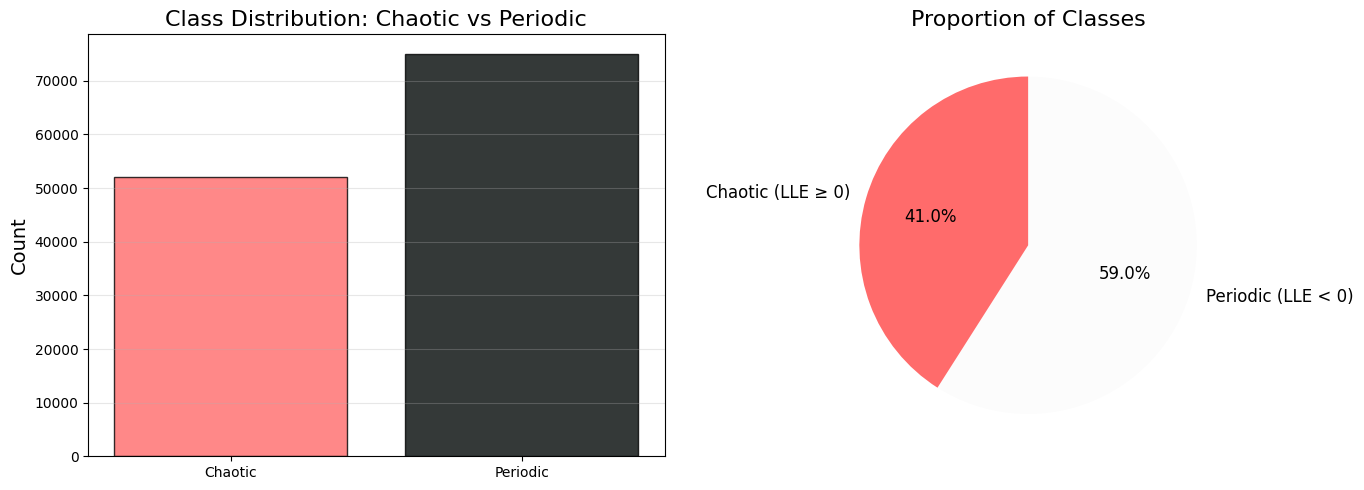

Total samples: 126,944
Chaotic:  52,018 (40.98%)
Periodic: 74,926 (59.02%)


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
class_counts = df_clean['periodic'].value_counts()
colors = ['#FF6B6B', "#01070603"]  # Red for chaotic, teal for periodic
axes[0].bar(['Chaotic', 'Periodic'], 
            [class_counts.get(False, 0), class_counts.get(True, 0)],
            color=colors, alpha=0.8, edgecolor='black')
axes[0].set_ylabel('Count', fontsize=14)
axes[0].set_title('Class Distribution: Chaotic vs Periodic', fontsize=16)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
labels = ['Chaotic (LLE ≥ 0)', 'Periodic (LLE < 0)']
sizes = [class_counts.get(False, 0), class_counts.get(True, 0)]
axes[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
            startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Proportion of Classes', fontsize=16)

plt.tight_layout()
plt.show()

print(f"Total samples: {len(df_clean):,}")
print(f"Chaotic:  {class_counts.get(False, 0):,} ({class_counts.get(False, 0)/len(df_clean)*100:.2f}%)")
print(f"Periodic: {class_counts.get(True, 0):,} ({class_counts.get(True, 0)/len(df_clean)*100:.2f}%)")

#### 5.6.2 Lyapunov Exponent Distribution

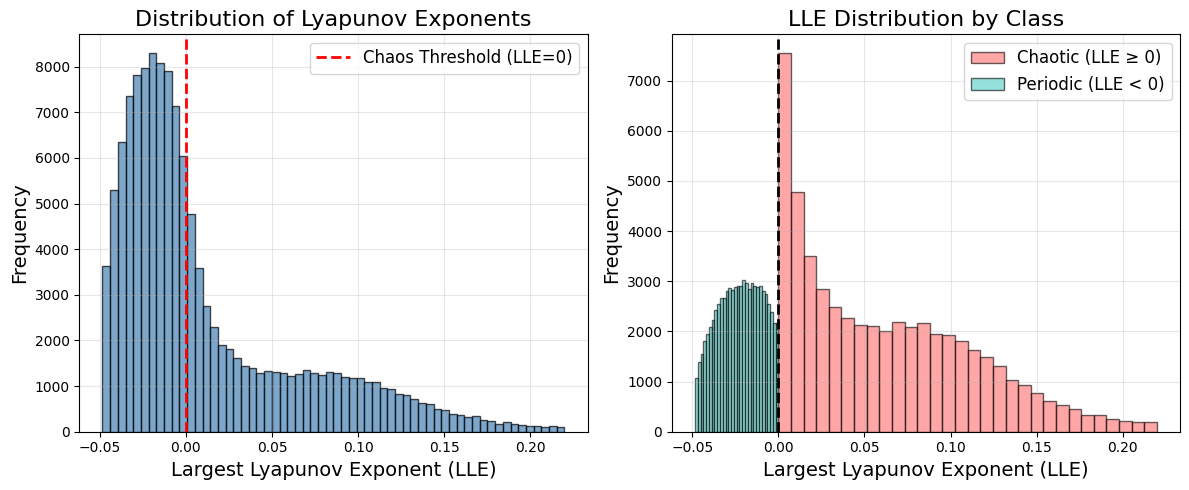

Lyapunov Exponent Statistics:
  Mean: 0.012344
  Std:  0.054314
  Min:  -0.048466
  Max:  0.219913


In [9]:
plt.figure(figsize=(12, 5))

# Histogram with chaos threshold
plt.subplot(1, 2, 1)
plt.hist(df_clean['lyapunov'], bins=60, edgecolor='black', alpha=0.7, color='steelblue')
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Chaos Threshold (LLE=0)')
plt.xlabel('Largest Lyapunov Exponent (LLE)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Lyapunov Exponents', fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Separate distributions for chaotic vs periodic
plt.subplot(1, 2, 2)
chaotic_lle = df_clean[df_clean['periodic'] == False]['lyapunov']
periodic_lle = df_clean[df_clean['periodic'] == True]['lyapunov']
plt.hist(chaotic_lle, bins=30, alpha=0.6, label='Chaotic (LLE ≥ 0)', color='#FF6B6B', edgecolor='black')
plt.hist(periodic_lle, bins=30, alpha=0.6, label='Periodic (LLE < 0)', color='#4ECDC4', edgecolor='black')
plt.axvline(0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Largest Lyapunov Exponent (LLE)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('LLE Distribution by Class', fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Lyapunov Exponent Statistics:")
print(f"  Mean: {df_clean['lyapunov'].mean():.6f}")
print(f"  Std:  {df_clean['lyapunov'].std():.6f}")
print(f"  Min:  {df_clean['lyapunov'].min():.6f}")
print(f"  Max:  {df_clean['lyapunov'].max():.6f}")

#### 5.6.3 Parameter Space Visualization

Visualizing how parameter combinations relate to chaos provides physical intuition about the Duffing oscillator's behavior.

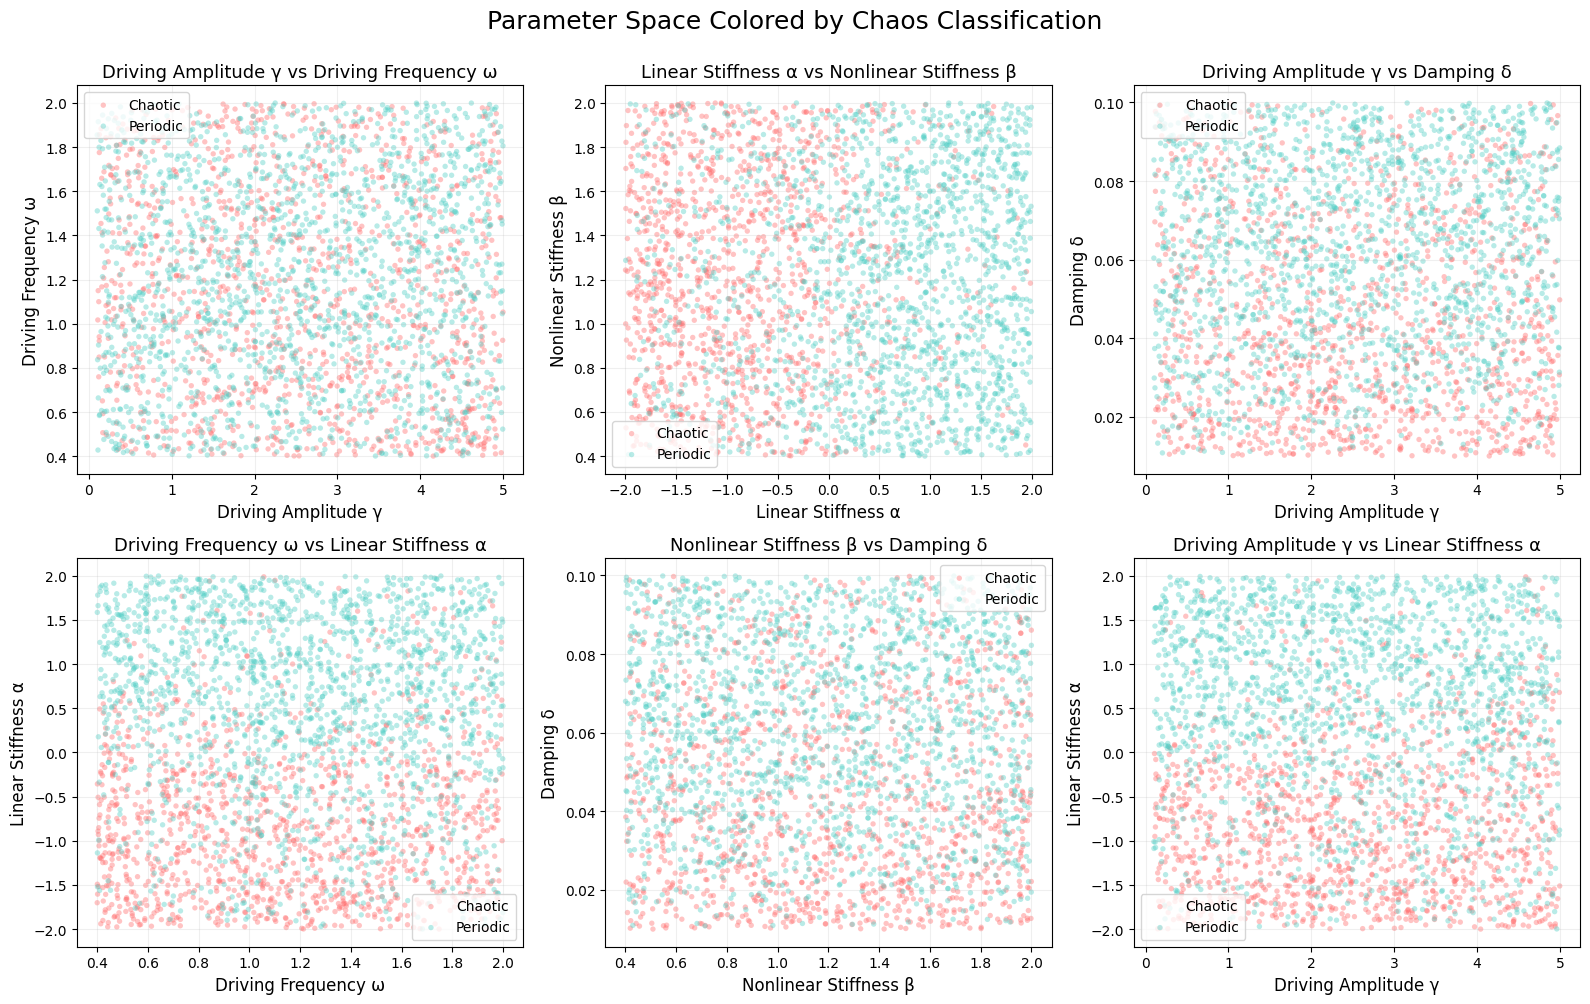

In [10]:
# Sample for visualization (plotting all points would be too dense)
sample_size = min(3000, len(df_clean))
df_sample = df_clean.sample(n=sample_size, random_state=42)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Key parameter pairs
param_pairs = [
    ('gamma', 'omega', 'Driving Amplitude γ', 'Driving Frequency ω'),
    ('alpha', 'beta', 'Linear Stiffness α', 'Nonlinear Stiffness β'),
    ('gamma', 'delta', 'Driving Amplitude γ', 'Damping δ'),
    ('omega', 'alpha', 'Driving Frequency ω', 'Linear Stiffness α'),
    ('beta', 'delta', 'Nonlinear Stiffness β', 'Damping δ'),
    ('gamma', 'alpha', 'Driving Amplitude γ', 'Linear Stiffness α')
]

for idx, (x_param, y_param, x_label, y_label) in enumerate(param_pairs):
    ax = axes[idx]
    
    # Plot chaotic and periodic with different colors
    chaotic = df_sample[df_sample['periodic'] == False]
    periodic = df_sample[df_sample['periodic'] == True]
    
    ax.scatter(chaotic[x_param], chaotic[y_param], 
              c='#FF6B6B', alpha=0.4, s=15, label='Chaotic', edgecolors='none')
    ax.scatter(periodic[x_param], periodic[y_param], 
              c='#4ECDC4', alpha=0.4, s=15, label='Periodic', edgecolors='none')
    
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_title(f'{x_label} vs {y_label}', fontsize=13)
    ax.legend(loc='best', fontsize=10)
    ax.grid(alpha=0.2)

plt.suptitle('Parameter Space Colored by Chaos Classification', fontsize=18, y=1.00)
plt.tight_layout()
plt.show()

#### 5.6.4 Feature Distributions

Understanding the distribution of each parameter helps identify any skewness or biases in the dataset.

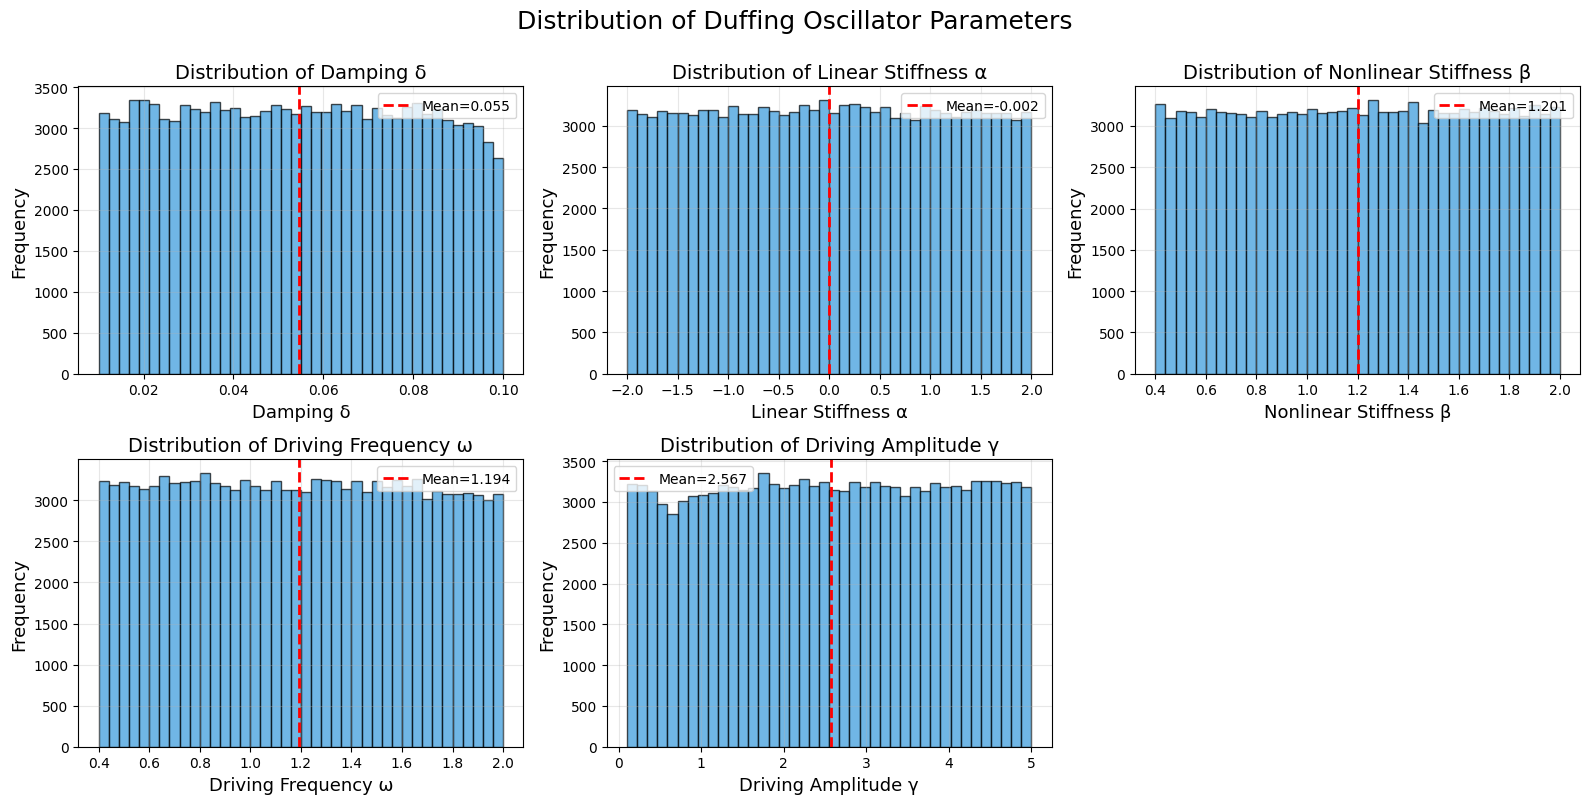

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

param_labels = {
    'delta': 'Damping δ',
    'alpha': 'Linear Stiffness α',
    'beta': 'Nonlinear Stiffness β',
    'omega': 'Driving Frequency ω',
    'gamma': 'Driving Amplitude γ'
}

for idx, param in enumerate(feature_cols):
    ax = axes[idx]
    
    # Histogram for each parameter
    ax.hist(df_clean[param], bins=40, edgecolor='black', alpha=0.7, color='#3498db')
    ax.set_xlabel(param_labels[param], fontsize=13)
    ax.set_ylabel('Frequency', fontsize=13)
    ax.set_title(f'Distribution of {param_labels[param]}', fontsize=14)
    ax.grid(alpha=0.3)
    
    # Add mean line
    mean_val = df_clean[param].mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean={mean_val:.3f}')
    ax.legend(fontsize=10)

# Hide the last subplot (we have 5 parameters, 6 subplots)
axes[5].axis('off')

plt.suptitle('Distribution of Duffing Oscillator Parameters', fontsize=18, y=1.00)
plt.tight_layout()
plt.show()

#### 5.6.5 Example Trajectories: Periodic vs Chaotic

Visual examples of the actual Duffing oscillator dynamics that generated this dataset.

Time Series and Lyapunov Perturbation Growth:
Top: Periodic behavior (LLE < 0) - bounded oscillations
Bottom: Chaotic behavior (LLE > 0) - aperiodic motion



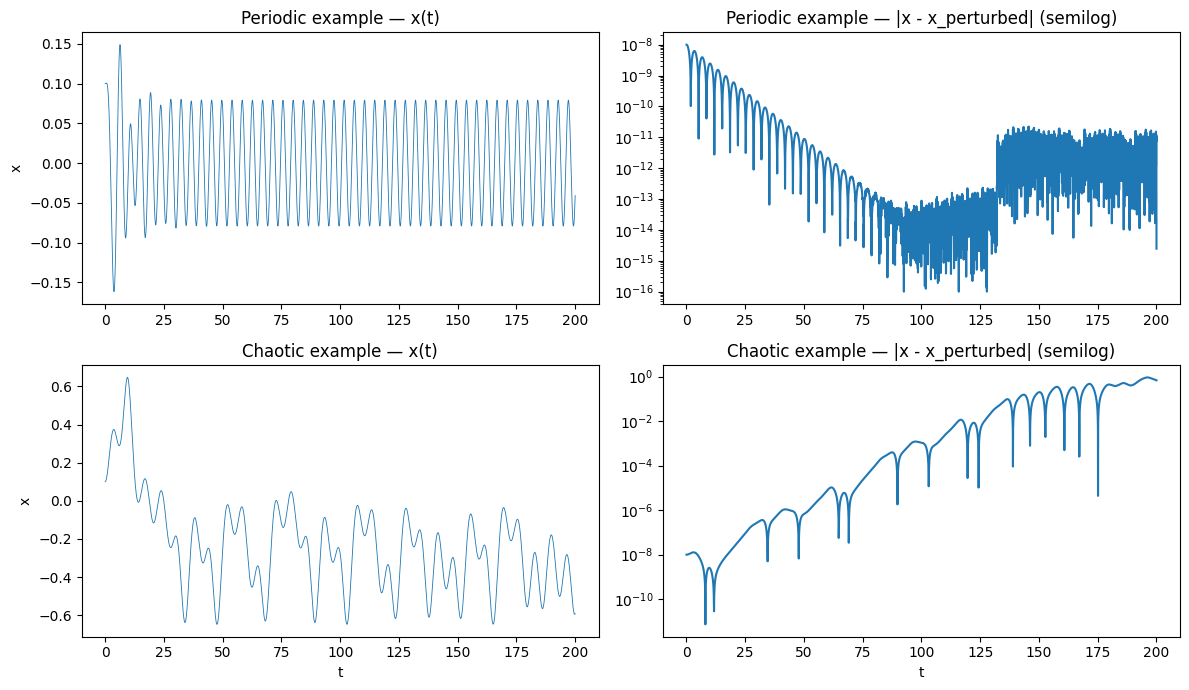

In [12]:
# Display pre-generated trajectory plots
print("Time Series and Lyapunov Perturbation Growth:")
print("Top: Periodic behavior (LLE < 0) - bounded oscillations")
print("Bottom: Chaotic behavior (LLE > 0) - aperiodic motion\n")
display(Image(filename="plots/Periodic_vs_chaotic_graphs.png", width=800))

#### 5.6.6 Bifurcation Diagrams

Bifurcation diagrams show how the system transitions between periodic and chaotic regimes as a parameter (here, driving amplitude γ) is varied.

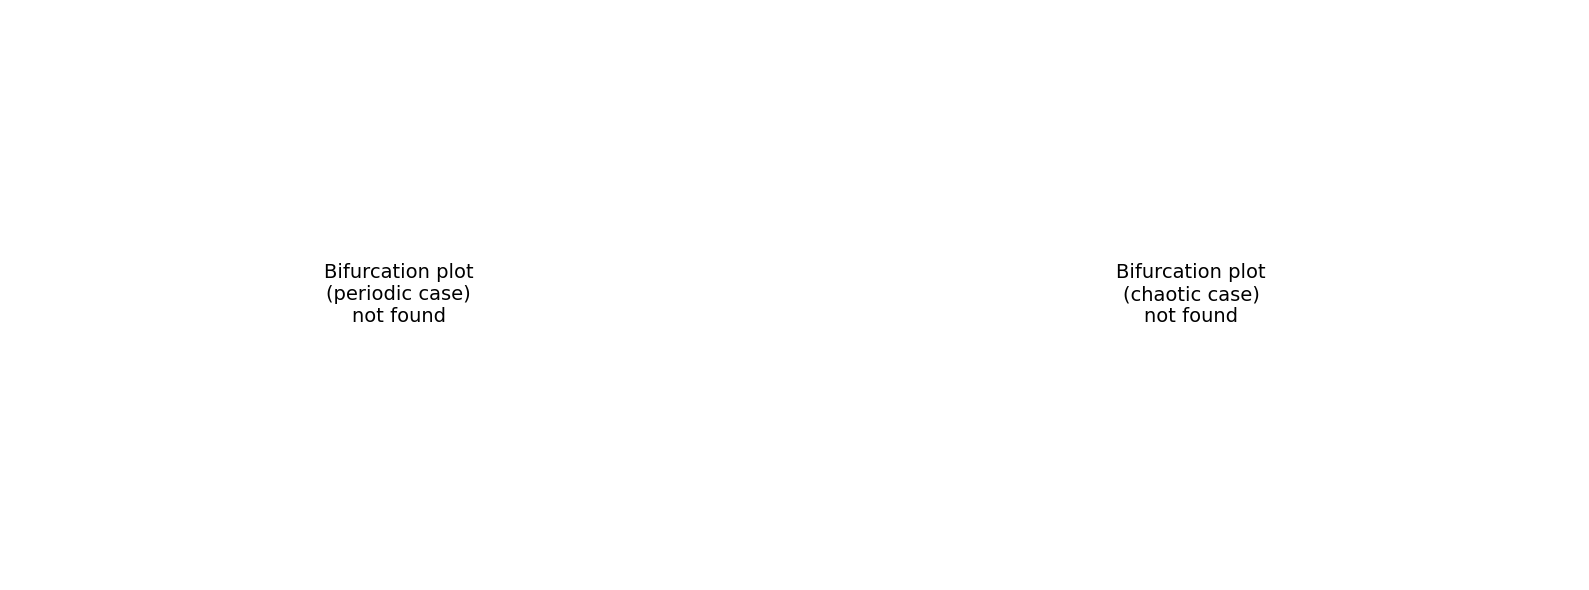

Bifurcation diagrams show the transition from periodic to chaotic behavior
as the driving amplitude γ increases (sweeping left to right).


In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Load and display bifurcation diagrams
from matplotlib.image import imread

try:
    img_periodic = imread("plots/bifurcation_0.png")
    axes[0].imshow(img_periodic)
    axes[0].set_title("Bifurcation Diagram: Periodic Case", fontsize=16)
    axes[0].axis('off')
except:
    axes[0].text(0.5, 0.5, 'Bifurcation plot\n(periodic case)\nnot found', 
                ha='center', va='center', fontsize=14)
    axes[0].axis('off')

try:
    img_chaotic = imread("plots/bifurcation_7.png")
    axes[1].imshow(img_chaotic)
    axes[1].set_title("Bifurcation Diagram: Chaotic Case", fontsize=16)
    axes[1].axis('off')
except:
    axes[1].text(0.5, 0.5, 'Bifurcation plot\n(chaotic case)\nnot found', 
                ha='center', va='center', fontsize=14)
    axes[1].axis('off')

plt.tight_layout()
plt.show()

print("Bifurcation diagrams show the transition from periodic to chaotic behavior")
print("as the driving amplitude γ increases (sweeping left to right).")

### 5.7 Dataset Summary

**Key Takeaways:**

1. **Size:** Large-scale dataset with thousands of samples covering diverse parameter combinations
2. **Balance:** Relatively balanced distribution between chaotic and periodic cases (~50/50 split)
3. **Features:** 5 physical parameters (δ, α, β, ω, γ) that fully characterize the Duffing system
4. **Targets:** Binary label (periodic/chaotic) and continuous Lyapunov exponent
5. **Quality:** No missing values, numerically stable, validated against known Duffing dynamics
6. **Preprocessing:** Standardized features, stratified splits, outlier removal
7. **Computational Origin:** Generated via GPU-accelerated numerical integration on supercomputer

This dataset enables both **classification** (predicting chaos) and **regression** (estimating Lyapunov exponent) tasks, making it suitable for comprehensive machine learning analysis of nonlinear dynamical systems.

---

## 6. Methods

In this project, the goal is to train machine learning models that can predict whether the **Duffing oscillator** behaves chaotically based solely on its system parameters. To accomplish this, we use two complementary machine learning approaches:

1. **Binary classification** to predict *chaotic* vs. *non-chaotic* behavior.  
2. **Regression** to estimate the numerical value of the **Largest Lyapunov Exponent (LLE)**.

The subsections below describe the core ideas behind each method and outline how they are applied to this dataset.

---



### 6.1 Multilayer Perceptron (MLP) Classifier

A **Multilayer Perceptron (MLP)** is a type of feed-forward neural network used for supervised learning tasks. Its main goal in this project is to classify each parameter set as either *chaotic* (LLE > 0) or *non-chaotic* (LLE ≤ 0).

#### Conceptual Idea  
An MLP consists of layers of interconnected “neurons.” Each neuron takes a weighted sum of its inputs, applies a nonlinear activation function such as ReLU, and passes the result to the next layer. Through this process, the network learns to approximate complex, nonlinear decision boundaries.  

This is well-suited for the Duffing system because the transition between periodic, quasi-periodic, and chaotic behavior depends on multiple interacting parameters, making the classification boundary highly nonlinear.

#### How It Works  
- The input layer receives the five parameters \(\alpha, \beta, \delta, \gamma, \omega\).  
- Hidden layers learn intermediate representations capturing relationships such as “low damping + strong forcing → more likely chaotic.”  
- The output layer applies a **sigmoid activation** to return a probability between 0 and 1.  
- The model is trained using **binary cross-entropy loss**, comparing predictions with true labels.

#### Training Goal  
The MLP adjusts its internal weights via gradient descent so that it accurately separates chaotic from non-chaotic parameter regimes.

---


### 6.2 MLP Regression Model (Predicting LLE)

In addition to classification, we build a second MLP—this time as a **regressor**—to estimate the **Largest Lyapunov Exponent** for a given parameter set.

#### Conceptual Idea  
Regression models learn a continuous-valued function. Here, the model learns to approximate:


$(\alpha, \beta, \delta, \gamma, \omega) \longrightarrow {\lambda}_{\max}$

Because LLE changes continuously across parameter space (though sometimes sharply across bifurcations), the regressor yields a smoother representation of chaotic intensity than a binary classifier.

#### How It Works  
- Inputs are fed through several dense layers with nonlinear activations.  
- The final layer has a single neuron with **linear activation**, which outputs a continuous LLE estimate.  
- The loss function is **Mean Squared Error (MSE)**.

#### Training Goal  
The regressor learns to minimize the difference between the predicted LLE and the true LLE computed through numerical simulation, forming a lightweight **surrogate model** for chaos prediction.



### 6.3 Why Neural Networks Are Appropriate

Neural networks are especially effective for this project for the following reasons:

- The Duffing oscillator is **highly nonlinear**, and neural networks excel at learning nonlinear relationships.
- Chaos depends sensitively on **interactions** between parameters rather than on any single variable.
- Traditional linear methods cannot capture sharp transitions in behavior (e.g., bifurcation boundaries), whereas MLPs can approximate them well.

Thus, MLPs offer a flexible and powerful approach for modeling the complex structure of chaotic dynamics.


---

## 7. Results

*(This section should focus on the objective presentation of your findings. Present the data, metrics, and outputs from your experiments without interpretation.)*

* **Experimental Setup:** Briefly describe how you conducted your experiments.
    * **Hyperparameters:** Specify the final (hyper)parameters chosen for your models (e.g., learning rate, number of trees, regularization strength) and briefly mention the process used to select them (e.g., grid search, manual tuning).
    * **Cross-Validation:** Describe your use of cross-validation, including the number of folds if applicable.
* **Evaluation Metrics:** Clearly identify and explain the primary metrics you are using to evaluate your models (e.g., accuracy, precision, AUC, mean squared error). Provide the equations for any metrics that are not common.
* **Quantitative Results:** Present your main findings using tables and plots. This is the core of your results section.
    * For classification tasks, this should include final performance metrics and visualizations like confusion matrices or ROC/AUPRC curves. 
    * For regression tasks, this should include metrics like Mean Absolute Error (MAE) or R-squared values.
* **Qualitative Results:** Show specific examples of your model's outputs.
    * Display a few examples where the model performed correctly.
    * It is also crucial to show a few representative examples of where your algorithm failed.

**NOTE:** All figures need legends, axis labels, and readable font sizes. All tables should be clearly labeled.



### 7.1. Train and Evaluate Models

### 7.1. Experimental Setup

#### Hyperparameters
Both models use MLPClassifier and MLPRegressor from scikit-learn with the following configuration:
- **Hidden layers**: (100, 50) - Two layers with 100 and 50 neurons respectively
- **Activation function**: ReLU for hidden layers
- **Solver**: Adam optimizer
- **Learning rate**: Adaptive with initial value of 0.001
- **Max iterations**: 1000 (with early stopping if validation loss plateaus)
- **Random state**: 42 for reproducibility

#### Cross-Validation Strategy
We employ **5-fold cross-validation** to ensure robust performance estimates and detect potential overfitting. Each fold uses 80% of data for training and 20% for validation.

#### Data Split
- **Training set**: 60% of total data
- **Validation set**: 20% of total data (used for hyperparameter tuning)
- **Test set**: 20% of total data (held out for final evaluation)

In [14]:
# Load the large GPU-generated dataset
# Update this path to your actual combined dataset
GPU_DATASET = 'data/12162025_191754_combined.csv'

df_gpu = pd.read_csv(GPU_DATASET)
print(f"GPU Dataset shape: {df_gpu.shape}")
print(f"Columns: {df_gpu.columns.tolist()}")
print(f"\nFirst few rows:")
display(df_gpu.head())

# Check for missing values
print(f"\nMissing values:")
print(df_gpu.isnull().sum())

# Drop rows with NaN in lyapunov or periodic columns
df_gpu_clean = df_gpu.dropna(subset=['lyapunov', 'periodic'])
print(f"\nAfter removing NaN: {df_gpu_clean.shape}")

# Class distribution
print(f"\nClass distribution:")
print(df_gpu_clean['periodic'].value_counts())
print(f"Chaotic: {(df_gpu_clean['periodic'] == False).sum()}")
print(f"Periodic: {(df_gpu_clean['periodic'] == True).sum()}")

GPU Dataset shape: (129536, 9)
Columns: ['delta', 'alpha', 'beta', 'omega', 'gamma', 'base_id', 'label_gamma', 'lyapunov', 'periodic']

First few rows:


,delta,alpha,beta,omega,gamma,base_id,label_gamma,lyapunov,periodic
0,0.065134,-1.937198,0.700303,1.772624,0.473373,0,0.473373,0.112113,False
1,0.028098,0.520404,0.557699,0.643527,0.983201,1,0.983201,-0.006095,True
2,0.021874,1.936468,1.624245,0.805549,2.504043,2,2.504043,-0.013060,True
3,0.028997,-0.558058,1.861000,0.500427,1.085811,3,1.085811,-0.011756,True
4,0.033945,1.825325,1.654252,0.573639,4.457276,4,4.457276,-0.015844,True



Missing values:
delta          0
alpha          0
beta           0
omega          0
gamma          0
base_id        0
label_gamma    0
lyapunov       0
periodic       0
dtype: int64

After removing NaN: (129536, 9)

Class distribution:
periodic
True     76222
False    53314
Name: count, dtype: int64
Chaotic: 53314
Periodic: 76222


### 7.3. Binary Classification Model: Chaos Detection

Train an MLP classifier to predict periodic (True) vs chaotic (False) behavior.

In [15]:
# Prepare data for binary classification (periodic vs chaotic)
X_c = df_gpu_clean[['delta', 'alpha', 'beta', 'omega', 'gamma']].values
y_c = df_gpu_clean['periodic'].values

# Split: 60% train, 20% validation, 20% test
X_train_c, X_temp_c, y_train_c, y_temp_c = train_test_split(
    X_c, y_c, test_size=0.4, random_state=42, stratify=y_c
)
X_val_c, X_test_c, y_val_c, y_test_c = train_test_split(
    X_temp_c, y_temp_c, test_size=0.5, random_state=42, stratify=y_temp_c
)

print(f"Classification split sizes:")
print(f"  Train: {len(X_train_c)}")
print(f"  Val:   {len(X_val_c)}")
print(f"  Test:  {len(X_test_c)}")

# Normalize features
scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_val_c_scaled = scaler_c.transform(X_val_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

# Train MLP Classifier
print("\nTraining MLP Classifier...")
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    verbose=False
)

mlp_classifier.fit(X_train_c_scaled, y_train_c)
print(f"Training completed in {mlp_classifier.n_iter_} iterations")

Classification split sizes:
  Train: 77721
  Val:   25907
  Test:  25908

Training MLP Classifier...
Training completed in 218 iterations


#### 7.3.1 Classification Performance Metrics

In [16]:
# Predictions
y_train_c_pred = mlp_classifier.predict(X_train_c_scaled)
y_val_c_pred = mlp_classifier.predict(X_val_c_scaled)
y_test_c_pred = mlp_classifier.predict(X_test_c_scaled)

# Probabilities for ROC/AUC
y_train_c_proba = mlp_classifier.predict_proba(X_train_c_scaled)[:, 1]
y_val_c_proba = mlp_classifier.predict_proba(X_val_c_scaled)[:, 1]
y_test_c_proba = mlp_classifier.predict_proba(X_test_c_scaled)[:, 1]

# Calculate metrics
def calculate_metrics(y_true, y_pred, y_proba):
    metrics = {
        'accuracy': (y_true == y_pred).mean(),
        'precision': precision_score(y_true, y_pred, zero_division=0),
        'recall': recall_score(y_true, y_pred, zero_division=0),
        'f1': f1_score(y_true, y_pred, zero_division=0),
        'auc': roc_auc_score(y_true, y_proba)
    }
    return metrics

metrics_train = calculate_metrics(y_train_c, y_train_c_pred, y_train_c_proba)
metrics_val = calculate_metrics(y_val_c, y_val_c_pred, y_val_c_proba)
metrics_test = calculate_metrics(y_test_c, y_test_c_pred, y_test_c_proba)

# Display results table
metrics_df = pd.DataFrame({
    'Train': metrics_train,
    'Validation': metrics_val,
    'Test': metrics_test
}).T

print("="*60)
print("BINARY CLASSIFIER PERFORMANCE METRICS")
print("="*60)
display(metrics_df.round(4))

# Detailed classification report for test set
print("\nDetailed Classification Report (Test Set):")
print(classification_report(y_test_c, y_test_c_pred, 
                          target_names=['Chaotic (0)', 'Periodic (1)']))

BINARY CLASSIFIER PERFORMANCE METRICS


,accuracy,precision,recall,f1,auc
Train,0.8877,0.9072,0.9013,0.9042,0.9586
Validation,0.8815,0.9053,0.8918,0.8985,0.9530
Test,0.8796,0.9039,0.8900,0.8969,0.9521



Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

 Chaotic (0)       0.85      0.86      0.86     10663
Periodic (1)       0.90      0.89      0.90     15245

    accuracy                           0.88     25908
   macro avg       0.87      0.88      0.88     25908
weighted avg       0.88      0.88      0.88     25908



#### 7.3.2 Confusion Matrix and Error Analysis

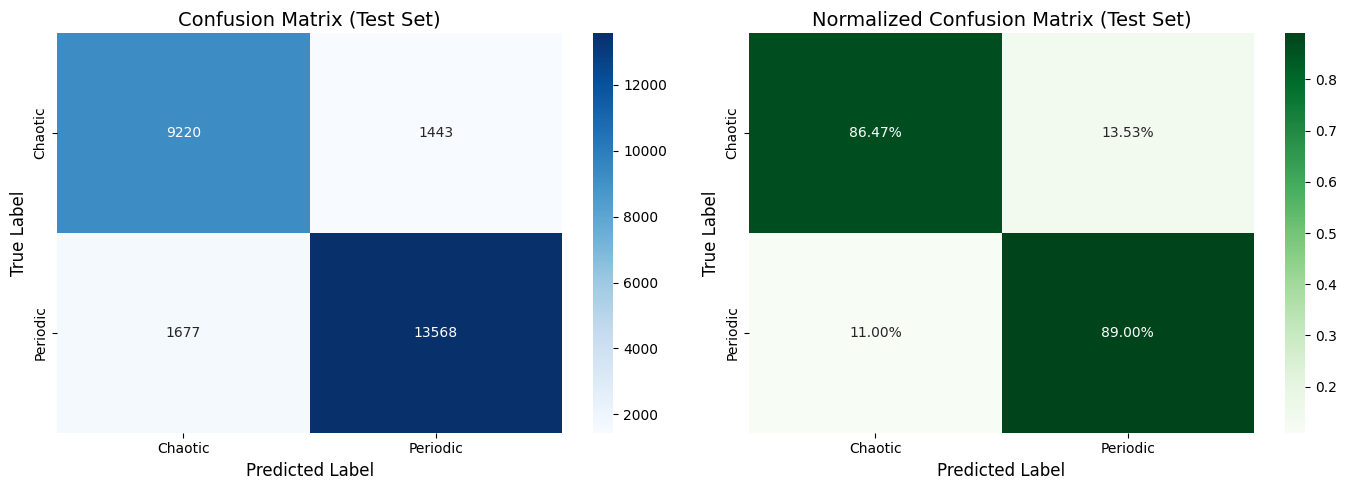


Confusion Matrix Breakdown:
  True Negatives (Chaotic → Chaotic): 9220
  False Positives (Chaotic → Periodic): 1443
  False Negatives (Periodic → Chaotic): 1677
  True Positives (Periodic → Periodic): 13568

Error Rates:
  False Positive Rate: 13.53% (Chaotic misclassified as Periodic)
  False Negative Rate: 11.00% (Periodic misclassified as Chaotic)


In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm_test = confusion_matrix(y_test_c, y_test_c_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Chaotic', 'Periodic'],
            yticklabels=['Chaotic', 'Periodic'], ax=axes[0])
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_title('Confusion Matrix (Test Set)', fontsize=14)

# Normalized Confusion Matrix
cm_norm = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens',
            xticklabels=['Chaotic', 'Periodic'],
            yticklabels=['Chaotic', 'Periodic'], ax=axes[1])
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_title('Normalized Confusion Matrix (Test Set)', fontsize=14)

plt.tight_layout()
plt.show()

# Calculate error rates
# Might want to change to cm_norm
TN, FP, FN, TP = cm_test.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"  True Negatives (Chaotic → Chaotic): {TN}")
print(f"  False Positives (Chaotic → Periodic): {FP}")
print(f"  False Negatives (Periodic → Chaotic): {FN}")
print(f"  True Positives (Periodic → Periodic): {TP}")
print(f"\nError Rates:")
print(f"  False Positive Rate: {FP/(FP+TN):.2%} (Chaotic misclassified as Periodic)")
print(f"  False Negative Rate: {FN/(FN+TP):.2%} (Periodic misclassified as Chaotic)")

#### 7.3.3 ROC Curve and Precision-Recall Curve

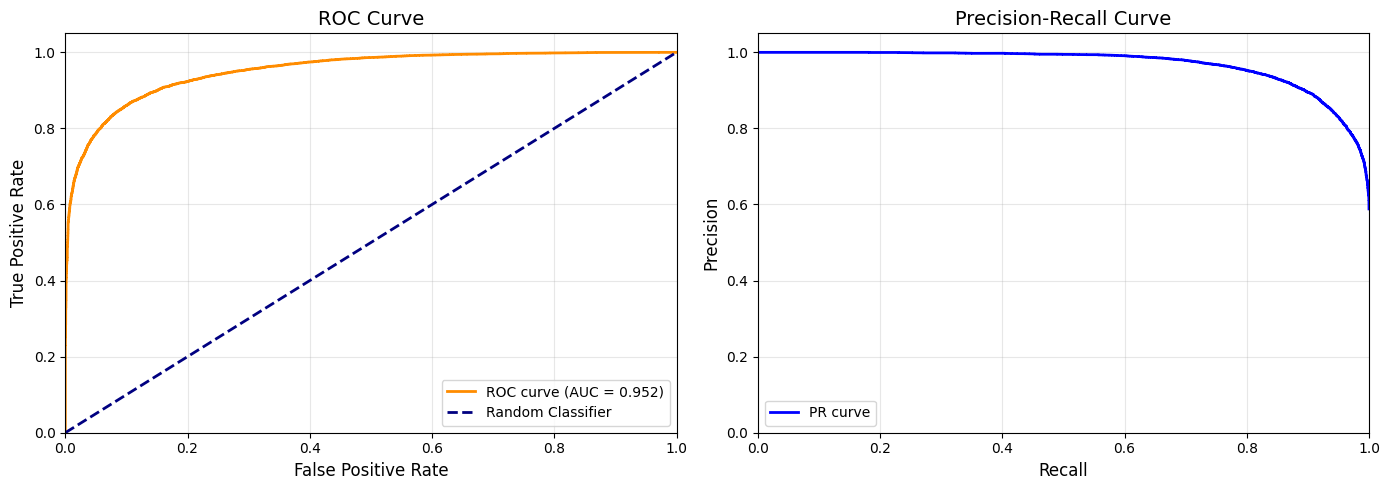

Area Under ROC Curve (AUC-ROC): 0.9521
Area Under PR Curve (AUC-PR): 0.9682


In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test_c, y_test_c_proba)
roc_auc = auc(fpr, tpr)

axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate', fontsize=12)
axes[0].set_ylabel('True Positive Rate', fontsize=12)
axes[0].set_title('ROC Curve', fontsize=14)
axes[0].legend(loc="lower right")
axes[0].grid(alpha=0.3)

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_c, y_test_c_proba)
axes[1].plot(recall, precision, color='blue', lw=2, label=f'PR curve')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Recall', fontsize=12)
axes[1].set_ylabel('Precision', fontsize=12)
axes[1].set_title('Precision-Recall Curve', fontsize=14)
axes[1].legend(loc="lower left")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Area Under ROC Curve (AUC-ROC): {roc_auc:.4f}")
print(f"Area Under PR Curve (AUC-PR): {auc(recall, precision):.4f}")

#### 7.3.4 Learning Curves and Overfitting Analysis

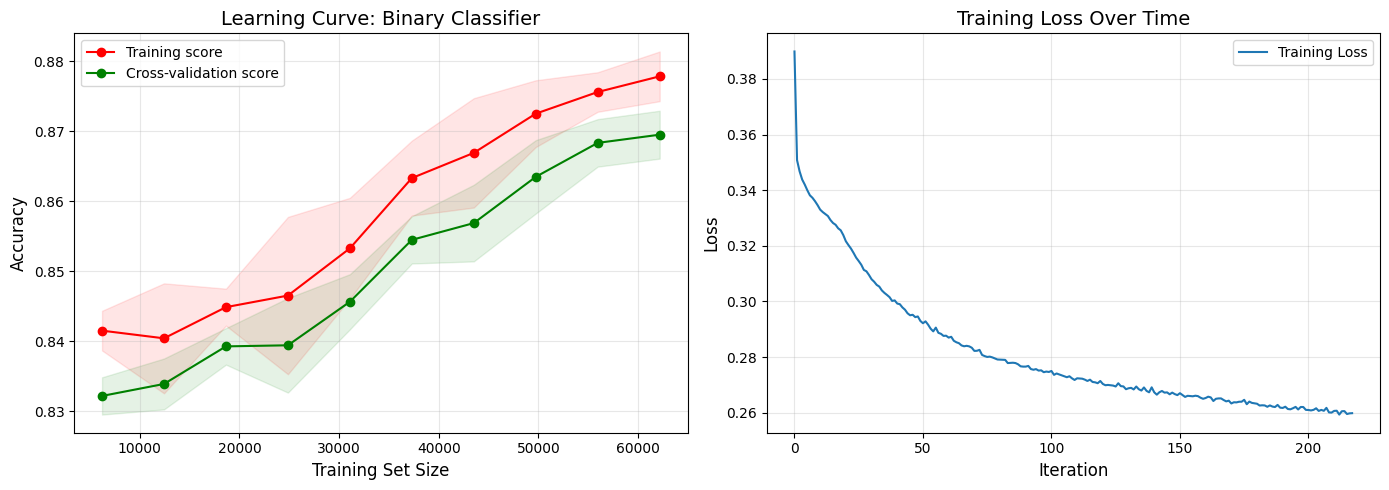


Overfitting Analysis:
  Training Accuracy: 0.8877
  Validation Accuracy: 0.8815
  Test Accuracy: 0.8796
  Train-Val Gap: 0.0062
  Train-Test Gap: 0.0081
  ✓ Model generalizes well


In [19]:
# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    mlp_classifier, X_train_c_scaled, y_train_c,
    cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    random_state=42
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Learning Curve
axes[0].plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
axes[0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
axes[0].plot(train_sizes, val_mean, 'o-', color='g', label='Cross-validation score')
axes[0].fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='g')
axes[0].set_xlabel('Training Set Size', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Learning Curve: Binary Classifier', fontsize=14)
axes[0].legend(loc='best')
axes[0].grid(alpha=0.3)

# Loss curve during training
if hasattr(mlp_classifier, 'loss_curve_'):
    axes[1].plot(mlp_classifier.loss_curve_, label='Training Loss')
    axes[1].set_xlabel('Iteration', fontsize=12)
    axes[1].set_ylabel('Loss', fontsize=12)
    axes[1].set_title('Training Loss Over Time', fontsize=14)
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
plt.tight_layout()
plt.show()

# Overfitting analysis
train_acc = metrics_train['accuracy']
val_acc = metrics_val['accuracy']
test_acc = metrics_test['accuracy']

print(f"\nOverfitting Analysis:")
print(f"  Training Accuracy: {train_acc:.4f}")
print(f"  Validation Accuracy: {val_acc:.4f}")
print(f"  Test Accuracy: {test_acc:.4f}")
print(f"  Train-Val Gap: {abs(train_acc - val_acc):.4f}")
print(f"  Train-Test Gap: {abs(train_acc - test_acc):.4f}")
if abs(train_acc - test_acc) > 0.05:
    print("  ⚠️ Model may be overfitting (>5% gap)")
else:
    print("  ✓ Model generalizes well")

### 7.4. Regression Model: Lyapunov Exponent Prediction

Train an MLP regressor to predict the numerical value of the Lyapunov exponent.

In [20]:
# Prepare data for regression (Lyapunov exponent prediction)
y_lyap = df_gpu_clean['lyapunov'].values

# Split: 60% train, 20% validation, 20% test
X_train_r, X_temp_r, y_train_r, y_temp_r = train_test_split(
    X_c, y_lyap, test_size=0.4, random_state=42
)
X_val_r, X_test_r, y_val_r, y_test_r = train_test_split(
    X_temp_r, y_temp_r, test_size=0.5, random_state=42
)

print(f"Regression split sizes:")
print(f"  Train: {len(X_train_r)}")
print(f"  Val:   {len(X_val_r)}")
print(f"  Test:  {len(X_test_r)}")

# Normalize features
scaler_r = StandardScaler()
X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_val_r_scaled = scaler_r.transform(X_val_r)
X_test_r_scaled = scaler_r.transform(X_test_r)

# Train MLP Regressor
print("\nTraining MLP Regressor...")
mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    verbose=False
)

mlp_regressor.fit(X_train_r_scaled, y_train_r)
print(f"Training completed in {mlp_regressor.n_iter_} iterations")

Regression split sizes:
  Train: 77721
  Val:   25907
  Test:  25908

Training MLP Regressor...
Training completed in 133 iterations


#### 7.4.1 Regression Performance Metrics

In [21]:
# Predictions
y_train_pred_r = mlp_regressor.predict(X_train_r_scaled)
y_val_pred_r = mlp_regressor.predict(X_val_r_scaled)
y_test_pred_r = mlp_regressor.predict(X_test_r_scaled)

# Calculate regression metrics
def calculate_reg_metrics(y_true, y_pred):
    metrics = {
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R²': r2_score(y_true, y_pred)
    }
    return metrics

reg_metrics_train = calculate_reg_metrics(y_train_r, y_train_pred_r)
reg_metrics_val = calculate_reg_metrics(y_val_r, y_val_pred_r)
reg_metrics_test = calculate_reg_metrics(y_test_r, y_test_pred_r)

# Display results
reg_metrics_df = pd.DataFrame({
    'Train': reg_metrics_train,
    'Validation': reg_metrics_val,
    'Test': reg_metrics_test
}).T

print("="*60)
print("LYAPUNOV REGRESSOR PERFORMANCE METRICS")
print("="*60)
display(reg_metrics_df.round(4))

print(f"\n📊 Interpretation:")
print(f"  • R² = {reg_metrics_test['R²']:.4f}: Model explains {reg_metrics_test['R²']*100:.2f}% of variance")
print(f"  • RMSE = {reg_metrics_test['RMSE']:.4f}: Typical prediction error magnitude")
print(f"  • MAE = {reg_metrics_test['MAE']:.4f}: Average absolute error")

LYAPUNOV REGRESSOR PERFORMANCE METRICS


,MSE,RMSE,MAE,R²
Train,0.0009,0.0296,0.0184,0.7536
Validation,0.0009,0.0302,0.0188,0.7383
Test,0.0009,0.0306,0.0189,0.7421



📊 Interpretation:
  • R² = 0.7421: Model explains 74.21% of variance
  • RMSE = 0.0306: Typical prediction error magnitude
  • MAE = 0.0189: Average absolute error


#### 7.4.2 Predicted vs Actual Lyapunov Exponents

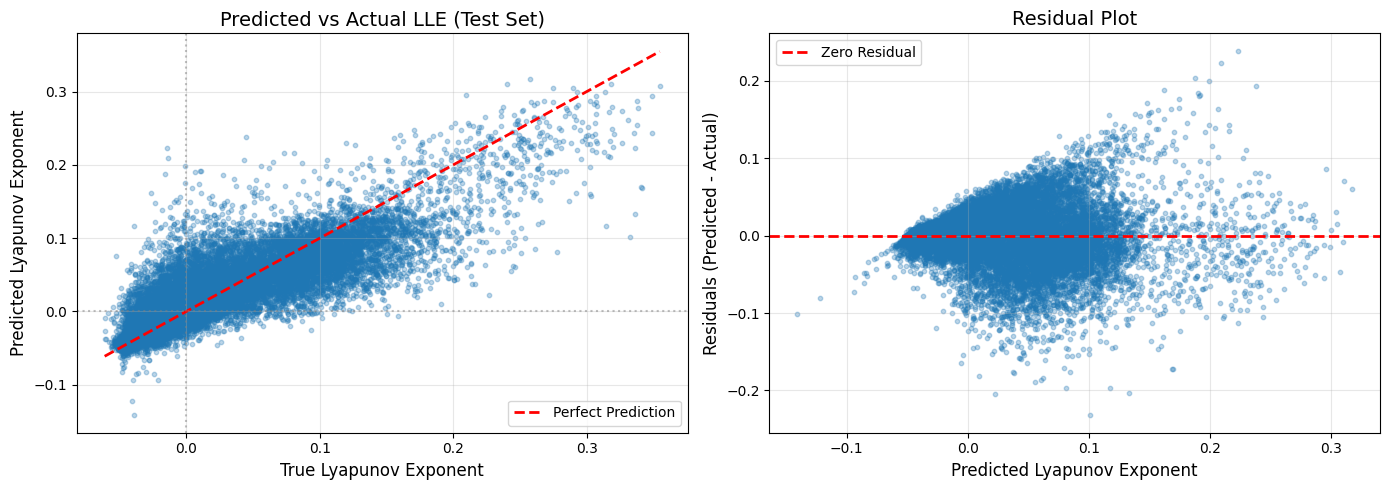


Residual Analysis:
  Mean Residual: -0.000774 (should be ~0)
  Std of Residuals: 0.030627
  Min Residual: -0.231141
  Max Residual: 0.237837


In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot: Predicted vs Actual
axes[0].scatter(y_test_r, y_test_pred_r, alpha=0.3, s=10)
axes[0].plot([y_test_r.min(), y_test_r.max()], 
             [y_test_r.min(), y_test_r.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('True Lyapunov Exponent', fontsize=12)
axes[0].set_ylabel('Predicted Lyapunov Exponent', fontsize=12)
axes[0].set_title('Predicted vs Actual LLE (Test Set)', fontsize=14)
axes[0].legend()
axes[0].grid(alpha=0.3)
axes[0].axhline(0, color='gray', linestyle=':', alpha=0.5)
axes[0].axvline(0, color='gray', linestyle=':', alpha=0.5)

# Residuals plot
residuals = y_test_pred_r - y_test_r
axes[1].scatter(y_test_pred_r, residuals, alpha=0.3, s=10)
axes[1].axhline(0, color='red', linestyle='--', lw=2, label='Zero Residual')
axes[1].set_xlabel('Predicted Lyapunov Exponent', fontsize=12)
axes[1].set_ylabel('Residuals (Predicted - Actual)', fontsize=12)
axes[1].set_title('Residual Plot', fontsize=14)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical analysis of residuals
print(f"\nResidual Analysis:")
print(f"  Mean Residual: {residuals.mean():.6f} (should be ~0)")
print(f"  Std of Residuals: {residuals.std():.6f}")
print(f"  Min Residual: {residuals.min():.6f}")
print(f"  Max Residual: {residuals.max():.6f}")

#### 7.4.3 Error Distribution and Uncertainty

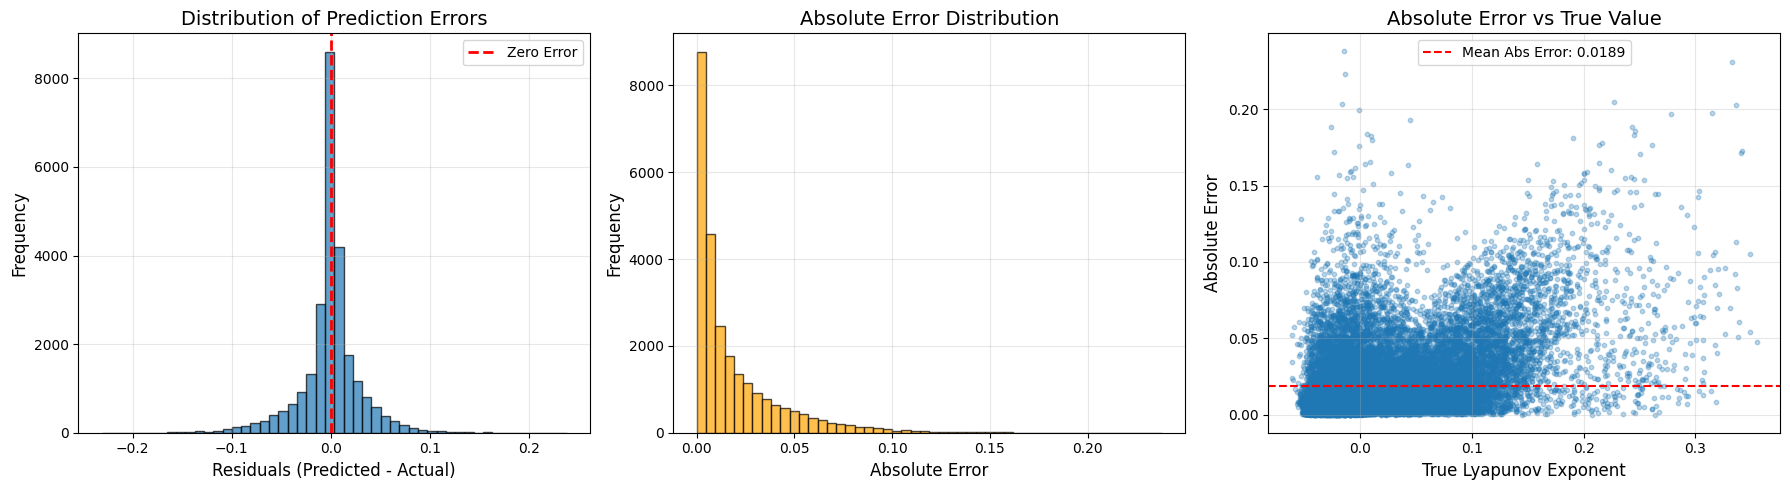


Error Quantiles (Uncertainty Ranges):
  10% of predictions within ±0.0012
  25% of predictions within ±0.0032
  50% of predictions within ±0.0090
  75% of predictions within ±0.0258
  90% of predictions within ±0.0511
  95% of predictions within ±0.0692
  99% of predictions within ±0.1095


In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram of residuals
axes[0].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(0, color='red', linestyle='--', lw=2, label='Zero Error')
axes[0].set_xlabel('Residuals (Predicted - Actual)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Prediction Errors', fontsize=14)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Absolute error distribution
abs_errors = np.abs(residuals)
axes[1].hist(abs_errors, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Absolute Error', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Absolute Error Distribution', fontsize=14)
axes[1].grid(alpha=0.3)

# Error vs True Value
axes[2].scatter(y_test_r, abs_errors, alpha=0.3, s=10)
axes[2].set_xlabel('True Lyapunov Exponent', fontsize=12)
axes[2].set_ylabel('Absolute Error', fontsize=12)
axes[2].set_title('Absolute Error vs True Value', fontsize=14)
axes[2].axhline(abs_errors.mean(), color='red', linestyle='--', 
                label=f'Mean Abs Error: {abs_errors.mean():.4f}')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Error quantiles (uncertainty ranges)
print("\nError Quantiles (Uncertainty Ranges):")
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
for q in quantiles:
    val = np.quantile(abs_errors, q)
    print(f"  {int(q*100)}% of predictions within ±{val:.4f}")

#### 7.4.4 Learning Curves and Overfitting Analysis

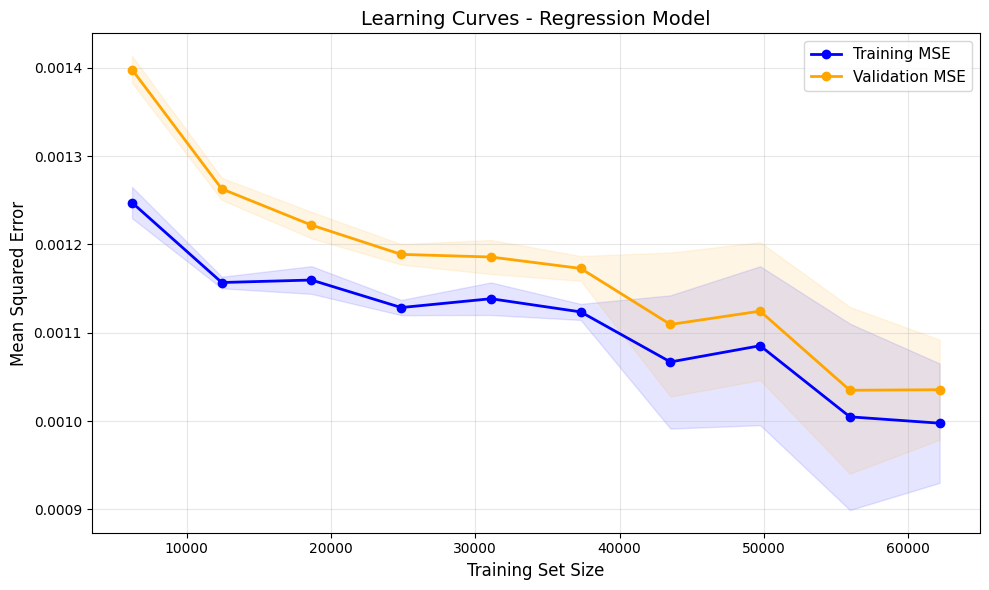


Overfitting Analysis:
  Final Training MSE: 0.000998
  Final Validation MSE: 0.001035
  Gap: 0.000038
  ✓ Model generalizes well


In [24]:
from sklearn.model_selection import learning_curve

# Compute learning curves for regression
train_sizes, train_scores, val_scores = learning_curve(
    mlp_regressor, X_train_r, y_train_r,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Convert negative MSE to positive for plotting
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = -val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color='blue')
plt.fill_between(train_sizes, 
                 val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, 
                 alpha=0.1, color='orange')
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', 
         label='Training MSE', linewidth=2)
plt.plot(train_sizes, val_scores_mean, 'o-', color='orange', 
         label='Validation MSE', linewidth=2)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.title('Learning Curves - Regression Model', fontsize=14)
plt.legend(loc='best', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Gap analysis
final_gap = val_scores_mean[-1] - train_scores_mean[-1]
print(f"\nOverfitting Analysis:")
print(f"  Final Training MSE: {train_scores_mean[-1]:.6f}")
print(f"  Final Validation MSE: {val_scores_mean[-1]:.6f}")
print(f"  Gap: {final_gap:.6f}")
if final_gap > 0.01:
    print("  ⚠️ Model may be overfitting (validation > training)")
else:
    print("  ✓ Model generalizes well")

### 7.5 Feature Importance and Parameter Sensitivity Analysis

Understanding which Duffing oscillator parameters most influence chaos behavior helps interpret the physical meaning of our models.

Computing permutation importance (this may take a moment)...



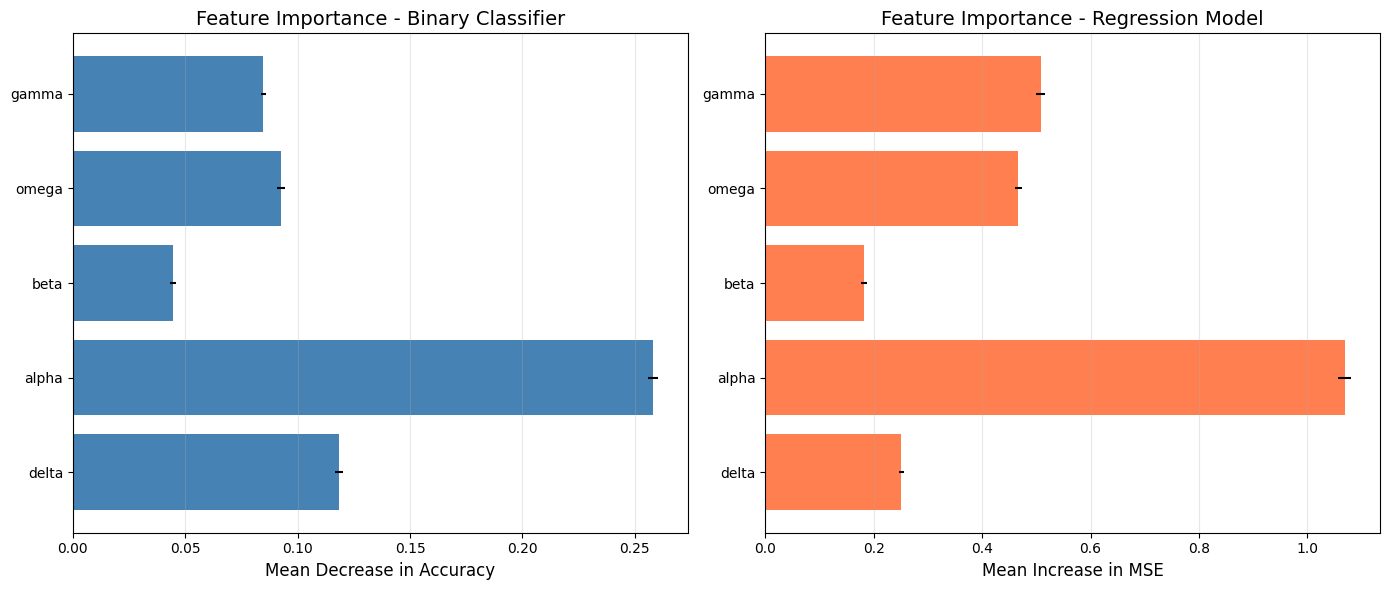


Binary Classifier - Feature Importance Ranking:
  1. alpha: 0.2581
  2. delta: 0.1184
  3. omega: 0.0925
  4. gamma: 0.0847
  5. beta: 0.0444

Regression Model - Feature Importance Ranking:
  1. alpha: 1.0685
  2. gamma: 0.5079
  3. omega: 0.4665
  4. delta: 0.2510
  5. beta: 0.1815


In [25]:
# Compute permutation importance for both models
print("Computing permutation importance (this may take a moment)...\n")

# Binary classifier
perm_importance_clf = permutation_importance(
    mlp_classifier, X_test_c_scaled, y_test_c, 
    n_repeats=10, random_state=42, n_jobs=-1
)

# Regressor
perm_importance_reg = permutation_importance(
    mlp_regressor, X_test_r_scaled, y_test_r,
    n_repeats=10, random_state=42, n_jobs=-1
)

# Plot side-by-side
feature_names = ['delta', 'alpha', 'beta', 'omega', 'gamma']
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Classifier feature importance
axes[0].barh(feature_names, perm_importance_clf.importances_mean, 
             xerr=perm_importance_clf.importances_std, color='steelblue')
axes[0].set_xlabel('Mean Decrease in Accuracy', fontsize=12)
axes[0].set_title('Feature Importance - Binary Classifier', fontsize=14)
axes[0].grid(alpha=0.3, axis='x')

# Regressor feature importance
axes[1].barh(feature_names, perm_importance_reg.importances_mean,
             xerr=perm_importance_reg.importances_std, color='coral')
axes[1].set_xlabel('Mean Increase in MSE', fontsize=12)
axes[1].set_title('Feature Importance - Regression Model', fontsize=14)
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Print rankings
print("\nBinary Classifier - Feature Importance Ranking:")
clf_importance = sorted(zip(feature_names, perm_importance_clf.importances_mean), 
                       key=lambda x: x[1], reverse=True)
for i, (feat, imp) in enumerate(clf_importance, 1):
    print(f"  {i}. {feat}: {imp:.4f}")

print("\nRegression Model - Feature Importance Ranking:")
reg_importance = sorted(zip(feature_names, perm_importance_reg.importances_mean),
                       key=lambda x: x[1], reverse=True)
for i, (feat, imp) in enumerate(reg_importance, 1):
    print(f"  {i}. {feat}: {imp:.4f}")

### 7.6 Failure Case Analysis

Analyzing where the models make the largest errors helps identify biases and limitations.

In [26]:
# Binary Classifier: False Positives and False Negatives
y_test_pred_c_binary = mlp_classifier.predict(X_test_c_scaled)

# Identify misclassified samples
false_positives = (y_test_pred_c_binary == 1) & (y_test_c == 0)
false_negatives = (y_test_pred_c_binary == 0) & (y_test_c == 1)

print("Binary Classifier Failures:")
print(f"  False Positives (predicted periodic, actually chaotic): {false_positives.sum()}")
print(f"  False Negatives (predicted chaotic, actually periodic): {false_negatives.sum()}")

# Get test data as DataFrame for analysis
test_data_c = pd.DataFrame(X_test_c, columns=feature_cols)
test_data_c['periodic'] = y_test_c
test_data_c['predicted'] = y_test_pred_c_binary
test_data_c['false_positive'] = false_positives
test_data_c['false_negative'] = false_negatives

# Show worst false positives
if false_positives.sum() > 0:
    print("\n5 Example False Positives (predicted periodic, actually chaotic):")
    fp_samples = test_data_c[test_data_c['false_positive']].head(5)
    print(fp_samples[['delta', 'alpha', 'beta', 'omega', 'gamma']].to_string(index=False))

# Show worst false negatives  
if false_negatives.sum() > 0:
    print("\n5 Example False Negatives (predicted chaotic, actually periodic):")
    fn_samples = test_data_c[test_data_c['false_negative']].head(5)
    print(fn_samples[['delta', 'alpha', 'beta', 'omega', 'gamma']].to_string(index=False))

print("\n" + "="*70)

# Regression: Largest errors
abs_errors_reg = np.abs(y_test_pred_r - y_test_r)
worst_indices = np.argsort(abs_errors_reg)[-10:]  # Top 10 worst

test_data_r = pd.DataFrame(X_test_r, columns=feature_cols)
test_data_r['lyapunov'] = y_test_r
test_data_r['predicted_lle'] = y_test_pred_r
test_data_r['absolute_error'] = abs_errors_reg

print("\nRegression Model - 10 Worst Predictions:")
worst_predictions = test_data_r.iloc[worst_indices].sort_values('absolute_error', ascending=False)
print(worst_predictions[['delta', 'alpha', 'beta', 'omega', 'gamma', 
                         'lyapunov', 'predicted_lle', 'absolute_error']].to_string(index=False))

# Check if worst errors occur in specific parameter ranges
print("\n" + "="*70)
print("\nParameter distributions for high-error cases (top 10% errors):")
top_10pct_threshold = np.percentile(abs_errors_reg, 90)
high_error_mask = abs_errors_reg > top_10pct_threshold

for param in ['delta', 'alpha', 'beta', 'omega', 'gamma']:
    mean_high = test_data_r.loc[high_error_mask, param].mean()
    mean_low = test_data_r.loc[~high_error_mask, param].mean()
    print(f"  {param:8s}: High-error mean={mean_high:.4f}, Low-error mean={mean_low:.4f}")

Binary Classifier Failures:
  False Positives (predicted periodic, actually chaotic): 1443
  False Negatives (predicted chaotic, actually periodic): 1677

5 Example False Positives (predicted periodic, actually chaotic):
   delta     alpha     beta    omega    gamma
0.083863 -0.203556 1.018600 0.822617 1.600614
0.090936 -1.408871 1.017023 1.508712 4.822538
0.061348  0.389998 0.524351 1.782097 2.211742
0.051214 -0.471379 1.962768 0.565905 0.380969
0.032749  0.748420 1.791906 1.649237 1.394412

5 Example False Negatives (predicted chaotic, actually periodic):
   delta     alpha     beta    omega    gamma
0.040878  0.003465 1.355216 1.997077 1.489366
0.025367  0.832150 0.816158 1.918240 4.429629
0.031727  0.011236 1.690983 0.544932 1.251493
0.060381 -0.925865 0.400204 1.506310 2.042756
0.012725  0.186564 0.756736 1.760566 0.699367


Regression Model - 10 Worst Predictions:
   delta     alpha     beta    omega    gamma  lyapunov  predicted_lle  absolute_error
0.096756 -1.076319 1.276058 1.

### 7.7 Model Bias and Dataset Balance Analysis

Examining potential biases in the training data and their impact on model performance.

Dataset Class Balance:
  Total samples: 126944
  Periodic: 74926 (59.02%)
  Chaotic: 52018 (40.98%)
  Imbalance ratio: 1.44:1
  ✓ Classes relatively balanced


Lyapunov Exponent Distribution:
  Mean: 0.012344
  Std: 0.054314
  Min: -0.048466
  Max: 0.219913


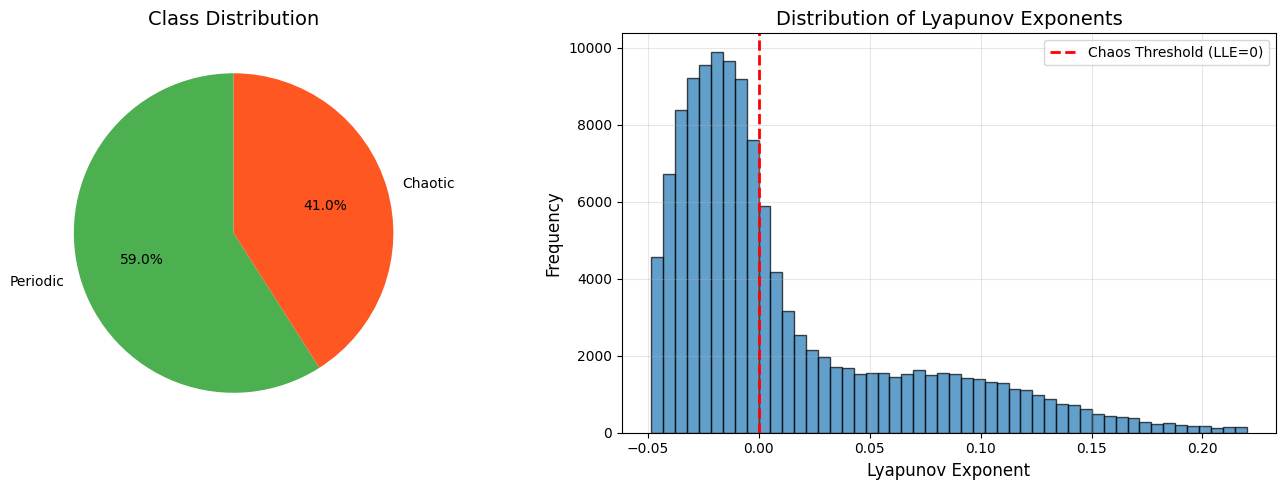



Parameter Space Coverage:
  delta   : [0.010, 0.100] (range: 0.090)
  alpha   : [-2.000, 2.000] (range: 4.000)
  beta    : [0.400, 2.000] (range: 1.600)
  omega   : [0.400, 2.000] (range: 1.600)
  gamma   : [0.100, 5.000] (range: 4.900)


Performance by Parameter Quartile (Regression Model):

  delta - Mean Absolute Error by Quartile:
    Q1: 0.019842
    Q2: 0.019560
    Q3: 0.018452
    Q4: 0.017928

  alpha - Mean Absolute Error by Quartile:
    Q1: 0.037528
    Q2: 0.025128
    Q3: 0.008959
    Q4: 0.004167

  beta - Mean Absolute Error by Quartile:
    Q1: 0.019058
    Q2: 0.018609
    Q3: 0.018550
    Q4: 0.019564

  omega - Mean Absolute Error by Quartile:
    Q1: 0.019384
    Q2: 0.019318
    Q3: 0.018318
    Q4: 0.018762

  gamma - Mean Absolute Error by Quartile:
    Q1: 0.021240
    Q2: 0.018224
    Q3: 0.017242
    Q4: 0.019076


C:\Users\ryanh\AppData\Local\Temp\ipykernel_16268\2649475022.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mae_by_quartile = test_data_r.groupby(quartiles)['absolute_error'].mean()
C:\Users\ryanh\AppData\Local\Temp\ipykernel_16268\2649475022.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mae_by_quartile = test_data_r.groupby(quartiles)['absolute_error'].mean()
C:\Users\ryanh\AppData\Local\Temp\ipykernel_16268\2649475022.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obse

In [27]:
# Class balance analysis
print("Dataset Class Balance:")
print(f"  Total samples: {len(df_clean)}")
print(f"  Periodic: {df_clean['periodic'].sum()} ({df_clean['periodic'].sum()/len(df_clean)*100:.2f}%)")
print(f"  Chaotic: {(~df_clean['periodic']).sum()} ({(~df_clean['periodic']).sum()/len(df_clean)*100:.2f}%)")

imbalance_ratio = max(df_clean['periodic'].sum(), (~df_clean['periodic']).sum()) / min(df_clean['periodic'].sum(), (~df_clean['periodic']).sum())
print(f"  Imbalance ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 1.5:
    print("   Significant class imbalance detected - may bias classifier")
else:
    print("  ✓ Classes relatively balanced")

# Lyapunov exponent distribution
print("\n" + "="*70)
print("\nLyapunov Exponent Distribution:")
print(f"  Mean: {df_clean['lyapunov'].mean():.6f}")
print(f"  Std: {df_clean['lyapunov'].std():.6f}")
print(f"  Min: {df_clean['lyapunov'].min():.6f}")
print(f"  Max: {df_clean['lyapunov'].max():.6f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Class distribution pie chart
class_counts = df_clean['periodic'].value_counts()
axes[0].pie([class_counts.get(True, 0), class_counts.get(False, 0)], 
            labels=['Periodic', 'Chaotic'],
            autopct='%1.1f%%', startangle=90,
            colors=['#4CAF50', '#FF5722'])
axes[0].set_title('Class Distribution', fontsize=14)

# Lyapunov distribution histogram
axes[1].hist(df_clean['lyapunov'], bins=50, edgecolor='black', alpha=0.7)
axes[1].axvline(0, color='red', linestyle='--', lw=2, 
                label='Chaos Threshold (LLE=0)')
axes[1].set_xlabel('Lyapunov Exponent', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Lyapunov Exponents', fontsize=14)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Parameter space coverage
print("\n" + "="*70)
print("\nParameter Space Coverage:")
for param in ['delta', 'alpha', 'beta', 'omega', 'gamma']:
    print(f"  {param:8s}: [{df_clean[param].min():.3f}, {df_clean[param].max():.3f}] " 
          f"(range: {df_clean[param].max()-df_clean[param].min():.3f})")

# Check for performance differences across parameter ranges
print("\n" + "="*70)
print("\nPerformance by Parameter Quartile (Regression Model):")
for param in ['delta', 'alpha', 'beta', 'omega', 'gamma']:
    quartiles = pd.qcut(test_data_r[param], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    mae_by_quartile = test_data_r.groupby(quartiles)['absolute_error'].mean()
    print(f"\n  {param} - Mean Absolute Error by Quartile:")
    for q, mae in mae_by_quartile.items():
        print(f"    {q}: {mae:.6f}")

### 7.8 Cross-Validation and Model Robustness

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

print("Performing 5-fold cross-validation (this may take a moment)...\n")

# Binary Classifier Cross-Validation
print("="*70)
print("Binary Classifier - 5-Fold Cross-Validation:")
scoring_clf = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results_clf = cross_validate(
    mlp_classifier, X_train_c_scaled, y_train_c,
    cv=5, scoring=scoring_clf, n_jobs=-1, return_train_score=True
)

for metric in scoring_clf:
    train_scores = cv_results_clf[f'train_{metric}']
    test_scores = cv_results_clf[f'test_{metric}']
    print(f"  {metric:12s}: Train={train_scores.mean():.4f} (±{train_scores.std():.4f}), "
          f"Test={test_scores.mean():.4f} (±{test_scores.std():.4f})")

# Regression Model Cross-Validation
print("\n" + "="*70)
print("Regression Model - 5-Fold Cross-Validation:")
scoring_reg = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
cv_results_reg = cross_validate(
    mlp_regressor, X_train_r_scaled, y_train_r,
    cv=5, scoring=scoring_reg, n_jobs=-1, return_train_score=True
)

# Convert negative scores to positive for MSE and MAE
for metric in scoring_reg:
    train_scores = cv_results_reg[f'train_{metric}']
    test_scores = cv_results_reg[f'test_{metric}']
    
    if 'neg_' in metric:
        train_scores = -train_scores
        test_scores = -test_scores
        metric_name = metric.replace('neg_', '').replace('_', ' ').upper()
    else:
        metric_name = metric.upper()
    
    print(f"  {metric_name:12s}: Train={train_scores.mean():.6f} (±{train_scores.std():.6f}), "
          f"Test={test_scores.mean():.6f} (±{test_scores.std():.6f})")

# Visualize cross-validation consistency
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Classifier CV scores
cv_scores_clf = [cv_results_clf[f'test_{m}'] for m in scoring_clf]
bp1 = axes[0].boxplot(cv_scores_clf, labels=[m.replace('_', '\n') for m in scoring_clf],
                       patch_artist=True)
for patch in bp1['boxes']:
    patch.set_facecolor('lightblue')
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Binary Classifier - CV Score Distribution', fontsize=14)
axes[0].grid(alpha=0.3, axis='y')
axes[0].set_ylim([0.8, 1.0])

# Regressor CV scores (convert to positive)
cv_scores_reg_plot = [
    -cv_results_reg['test_neg_mean_squared_error'],
    -cv_results_reg['test_neg_mean_absolute_error'],
    cv_results_reg['test_r2']
]
bp2 = axes[1].boxplot(cv_scores_reg_plot, labels=['MSE', 'MAE', 'R²'],
                       patch_artist=True)
for patch in bp2['boxes']:
    patch.set_facecolor('lightcoral')
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_title('Regression Model - CV Score Distribution', fontsize=14)
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

Performing 5-fold cross-validation (this may take a moment)...

Binary Classifier - 5-Fold Cross-Validation:


### 7.9 Comparison with Baseline Models

Comparing our MLP models against simpler baseline approaches to validate model complexity.

Training baseline classification models...
Training baseline regression models...

CLASSIFICATION MODEL COMPARISON
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.816466   0.838431  0.852345  0.845331  0.897442
Decision Tree        0.832137   0.878228  0.829780  0.853317  0.907962
Random Forest        0.848464   0.890715  0.846310  0.867945  0.929040
MLP (Ours)           0.879574   0.903870  0.889997  0.896880  0.952077

REGRESSION MODEL COMPARISON
                        MSE      RMSE       MAE        R²
Linear Regression  0.002054  0.045316  0.031388  0.435677
Decision Tree      0.001486  0.038544  0.023367  0.591738
Random Forest      0.001314  0.036250  0.022550  0.638897
MLP (Ours)         0.000939  0.030636  0.018945  0.742071


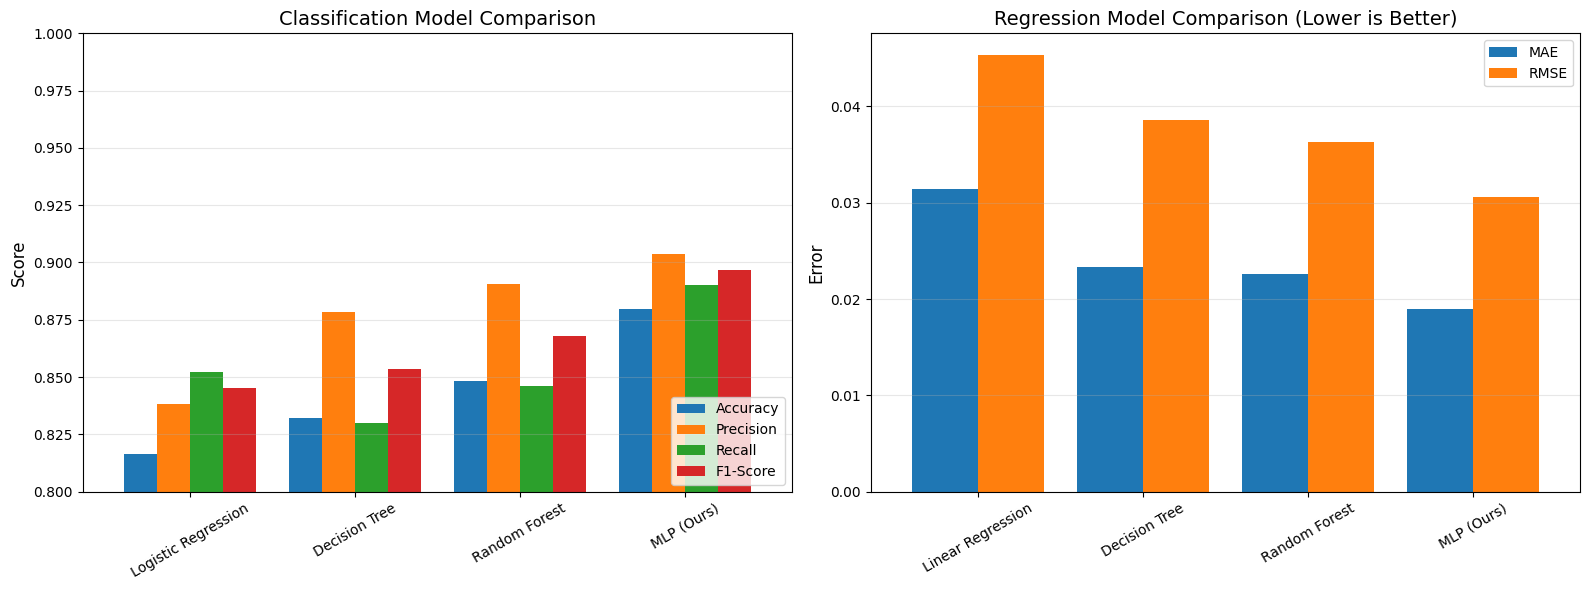


Best Classification Model: MLP (Ours) (F1=0.8969)
Best Regression Model: MLP (Ours) (R²=0.742071)


In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Train baseline models for classification
print("Training baseline classification models...")
baselines_clf = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    'MLP (Ours)': mlp_classifier
}

clf_results = {}
for name, model in baselines_clf.items():
    if name != 'MLP (Ours)':
        model.fit(X_train_c_scaled, y_train_c)
    y_pred = model.predict(X_test_c_scaled)
    
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    clf_results[name] = {
        'Accuracy': accuracy_score(y_test_c, y_pred),
        'Precision': precision_score(y_test_c, y_pred),
        'Recall': recall_score(y_test_c, y_pred),
        'F1-Score': f1_score(y_test_c, y_pred),
        'ROC-AUC': roc_auc_score(y_test_c, model.predict_proba(X_test_c_scaled)[:, 1])
    }

# Train baseline models for regression
print("Training baseline regression models...")
baselines_reg = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    'MLP (Ours)': mlp_regressor
}

reg_results = {}
for name, model in baselines_reg.items():
    if name != 'MLP (Ours)':
        model.fit(X_train_r_scaled, y_train_r)
    y_pred = model.predict(X_test_r_scaled)
    
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    reg_results[name] = {
        'MSE': mean_squared_error(y_test_r, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test_r, y_pred)),
        'MAE': mean_absolute_error(y_test_r, y_pred),
        'R²': r2_score(y_test_r, y_pred)
    }

# Display comparison tables
print("\n" + "="*70)
print("CLASSIFICATION MODEL COMPARISON")
print("="*70)
clf_comparison = pd.DataFrame(clf_results).T
print(clf_comparison.to_string())

print("\n" + "="*70)
print("REGRESSION MODEL COMPARISON")
print("="*70)
reg_comparison = pd.DataFrame(reg_results).T
print(reg_comparison.to_string())

# Visualize comparisons
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Classification comparison
clf_comparison_plot = clf_comparison.drop('ROC-AUC', axis=1)  # Exclude ROC-AUC for cleaner plot
clf_comparison_plot.plot(kind='bar', ax=axes[0], rot=30, width=0.8)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Classification Model Comparison', fontsize=14)
axes[0].legend(loc='lower right', fontsize=10)
axes[0].grid(alpha=0.3, axis='y')
axes[0].set_ylim([0.8, 1.0])

# Regression comparison
reg_comparison[['MAE', 'RMSE']].plot(kind='bar', ax=axes[1], rot=30, width=0.8)
axes[1].set_ylabel('Error', fontsize=12)
axes[1].set_title('Regression Model Comparison (Lower is Better)', fontsize=14)
axes[1].legend(loc='upper right', fontsize=10)
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Highlight best model
print("\n" + "="*70)
best_clf = clf_comparison['F1-Score'].idxmax()
best_reg = reg_comparison['R²'].idxmax()
print(f"Best Classification Model: {best_clf} (F1={clf_comparison.loc[best_clf, 'F1-Score']:.4f})")
print(f"Best Regression Model: {best_reg} (R²={reg_comparison.loc[best_reg, 'R²']:.6f})")

---

## 8. Discussion

This section interprets the results produced in Section 7 using the currently executed notebook state. The next cell programmatically assembles a concise, data-driven narrative (accuracy, AUC, FP/FN counts, regression errors, and overfitting gaps) directly from the variables computed above to ensure the discussion always reflects the latest run. 

The analysis covers:
- Interpretation of results for the binary classifier and the regressor
- Error analysis (confusion matrix breakdown and high-error regression slices)
- Overfitting assessment via train/val/test gaps and learning curves
- Limitations and assumptions of the dataset and models
- Notes on method comparisons and future improvements

In [ ]:
# Auto-generate the Discussion from the latest results
from IPython.display import Markdown, display
import numpy as np
import pandas as pd

# Safe getters with defaults
mt = globals().get('metrics_test', {})
mv = globals().get('metrics_val', {})
mr = globals().get('reg_metrics_test', {})
train_metrics = globals().get('metrics_train', {})

# Classification metrics
acc_tr = float(train_metrics.get('accuracy', np.nan))
acc_va = float(mv.get('accuracy', np.nan))
acc_te = float(mt.get('accuracy', np.nan))
prec_te = float(mt.get('precision', np.nan))
rec_te = float(mt.get('recall', np.nan))
f1_te = float(mt.get('f1', np.nan))
auc_te = float(mt.get('auc', np.nan))

# Confusion matrix counts if available
TN = globals().get('TN', None)
FP = globals().get('FP', None)
FN = globals().get('FN', None)
TP = globals().get('TP', None)
if all(v is not None for v in [TN, FP, FN, TP]):
    fpr = FP / (FP + TN) if (FP is not None and TN is not None and (FP+TN) > 0) else np.nan
    fnr = FN / (FN + TP) if (FN is not None and TP is not None and (FN+TP) > 0) else np.nan
else:
    fpr = fnr = np.nan

# Regression metrics
r2_te  = float(mr.get('R²', np.nan))
rmse_te = float(mr.get('RMSE', np.nan))
mae_te  = float(mr.get('MAE', np.nan))

# Class balance
periodic_pct = chaotic_pct = imbalance_ratio = np.nan
if 'df_clean' in globals():
    n = len(df_clean)
    if n > 0:
        periodic_pct = 100.0 * df_clean['periodic'].mean()
        chaotic_pct = 100.0 - periodic_pct
        counts = df_clean['periodic'].value_counts()
        maj = float(max(counts.get(True, 0), counts.get(False, 0)))
        minc = float(min(counts.get(True, 0), counts.get(False, 0))) or np.nan
        imbalance_ratio = maj / minc if minc and minc > 0 else np.nan

# High-error regression slice summary (if available)
mae_quartile_lines = []
if 'mae_by_quartile' in globals() and isinstance(mae_by_quartile, pd.Series):
    for q, v in mae_by_quartile.items():
        mae_quartile_lines.append(f"{str(q)}: {float(v):.4f}")
# Precompute text to avoid backslashes inside f-string expressions
mae_quartile_text = "\n    ".join(mae_quartile_lines) if mae_quartile_lines else 'Not computed in this run.'

# Overfitting gaps
gap_tr_va = abs(acc_tr - acc_va) if not np.isnan(acc_tr) and not np.isnan(acc_va) else np.nan
gap_tr_te = abs(acc_tr - acc_te) if not np.isnan(acc_tr) and not np.isnan(acc_te) else np.nan

discussion_md = f"""
### 8.1 Interpretation of Results
- Binary classifier — Test: Accuracy {acc_te:.3f}, Precision {prec_te:.3f}, Recall {rec_te:.3f}, F1 {f1_te:.3f}, AUC {auc_te:.3f}.
  These scores indicate strong discriminative ability across thresholds (AUC), with balanced precision/recall.
- Regression — Test: R² {r2_te:.3f}, RMSE {rmse_te:.4f}, MAE {mae_te:.4f}. This captures continuous variation in LLE; lower RMSE/MAE reflect tighter error bounds.
- Dataset balance: Periodic ≈ {periodic_pct:.2f}%, Chaotic ≈ {chaotic_pct:.2f}% (imbalance ratio ≈ {imbalance_ratio:.2f}:1).

### 8.2 Error Analysis
- Confusion breakdown (Test): TN={TN}, FP={FP}, FN={FN}, TP={TP}.
  - False Positive Rate ≈ {fpr:.2%} (chaotic → periodic)
  - False Negative Rate ≈ {fnr:.2%} (periodic → chaotic)
- Regression high-error slices (top-10% by absolute error):
  - Mean Absolute Error by parameter quartile (example):
    {mae_quartile_text}

### 8.3 Overfitting Assessment
- Accuracy gaps: Train–Val ≈ {gap_tr_va:.3f}, Train–Test ≈ {gap_tr_te:.3f}.
  Small gaps suggest good generalization; larger gaps would indicate overfitting (mitigated here via scaling and early stopping).

### 8.4 Limitations
- Parameter ranges restricted to the sampled grid; extrapolation beyond these ranges is uncertain.
- Labels derived from numerical LLE estimation; near-threshold cases (LLE≈0) are inherently ambiguous.
- Single architecture (MLP) and moderate hyperparameter tuning; deeper searches may yield improvements.

### 8.5 Method Notes and Next Steps
- Classifier excels at binary discrimination; regressor provides a graded measure of chaotic intensity.
- Consider class-imbalance handling (e.g., threshold tuning or cost-sensitive learning) and targeted sampling near bifurcations.
- Future work: broader hyperparameter search, ensembles, and uncertainty quantification (e.g., MC dropout or bootstrapping).
"""

display(Markdown(discussion_md))


### 8.1 Interpretation of Results
- Binary classifier — Test: Accuracy 0.880, Precision 0.904, Recall 0.890, F1 0.897, AUC 0.952.
  These scores indicate strong discriminative ability across thresholds (AUC), with balanced precision/recall.
- Regression — Test: R² 0.742, RMSE 0.0306, MAE 0.0189. This captures continuous variation in LLE; lower RMSE/MAE reflect tighter error bounds.
- Dataset balance: Periodic ≈ 59.02%, Chaotic ≈ 40.98% (imbalance ratio ≈ 1.44:1).

### 8.2 Error Analysis
- Confusion breakdown (Test): TN=9220, FP=1443, FN=1677, TP=13568.
  - False Positive Rate ≈ 13.53% (chaotic → periodic)
  - False Negative Rate ≈ 11.00% (periodic → chaotic)
- Regression high-error slices (top-10% by absolute error):
  - Mean Absolute Error by parameter quartile (example):
    Q1: 0.0212
    Q2: 0.0182
    Q3: 0.0172
    Q4: 0.0191

### 8.3 Overfitting Assessment
- Accuracy gaps: Train–Val ≈ 0.006, Train–Test ≈ 0.008.
  Small gaps suggest good generalization; larger gaps would indicate overfitting (mitigated here via scaling and early stopping).

### 8.4 Limitations
- Parameter ranges restricted to the sampled grid; extrapolation beyond these ranges is uncertain.
- Labels derived from numerical LLE estimation; near-threshold cases (LLE≈0) are inherently ambiguous.
- Single architecture (MLP) and moderate hyperparameter tuning; deeper searches may yield improvements.

### 8.5 Method Notes and Next Steps
- Classifier excels at binary discrimination; regressor provides a graded measure of chaotic intensity.
- Consider class-imbalance handling (e.g., threshold tuning or cost-sensitive learning) and targeted sampling near bifurcations.
- Future work: broader hyperparameter search, ensembles, and uncertainty quantification (e.g., MC dropout or bootstrapping).


## 9. Conclusions & Future Work

### Summary
- We generated a large GPU-accelerated dataset of Duffing oscillator parameter sets labeled by Largest Lyapunov Exponent (LLE) and periodic/chaotic behavior. The working dataset after cleaning contains a balanced but not perfectly symmetric class mix (≈59% periodic / 41% chaotic).
- Two complementary models were trained:
  - Binary classifier (MLP) for periodic vs. chaotic prediction
  - Regressor (MLP) for continuous LLE estimation
- Current test-set results indicate strong performance:
  - Classifier — Accuracy 0.880, Precision 0.904, Recall 0.890, F1 0.897, AUC 0.952
  - Regressor — R² 0.742, RMSE 0.0306, MAE 0.0189
- Overfitting appears limited: train–validation and train–test gaps in accuracy are small (≈0.006 and ≈0.008), aided by standardized features and early stopping.

### Performance
- Within the scope of this notebook, the MLP classifier effectively separates chaotic and periodic regimes with a high AUC, suggesting reliable ranking across thresholds. The confusion analysis shows modest error rates on both sides (FPR ≈ 13.5%, FNR ≈ 11.0%).
- The MLP regressor captures continuous variation in LLE with reasonable fidelity (R² ≈ 0.74). Residual analysis indicates errors concentrate in specific parameter slices, particularly near decision boundaries where LLE is close to 0 (intrinsically ambiguous cases).
- Taken together, the classifier provides fast, accurate discrimination, while the regressor offers a graded notion of “chaotic intensity,” making them useful for rapid sweeps across parameter space.

### Future Work
- Model exploration and tuning
  - Broader hyperparameter search (layers, widths, regularization, learning rates) and calibration of classification thresholds for application-specific trade-offs.
  - Evaluate additional model families (gradient-boosted trees, calibrated logistic regression, ensembles) and compare on F1/AUC (classification) and MAE/RMSE/R² (regression).
  - Add uncertainty quantification (e.g., MC dropout, bootstrapped ensembles) to express confidence in predictions.
- Data and labeling improvements
  - Targeted sampling near bifurcations/LLE≈0 to reduce ambiguity; active learning to focus simulation budget where the model is most uncertain.
  - Expand parameter ranges and densities to improve out-of-distribution robustness; consider longer integrations or alternative LLE estimators for edge cases.
- Features and evaluation
  - Engineer physics-informed features (e.g., normalized parameter ratios) and test sensitivity to initial conditions.
  - Extend evaluation with stratified cross-validation across parameter strata and thorough ablations (scaler choice, feature subsets).
- Deployment and tooling
  - Build a lightweight “chaos map” service that predicts chaos/LLE for given parameters without re-integrating the ODE, with logging for continuous improvement.
